### Carga de Base de datos y Librerias

In [1]:
# Cargamos todas las librerias que vamos a necesitar y abrimos la ruta al repositorio

# PARTE 1
!pip install openpyxl
!pip install matplotlib pandas
!pip install pandas pyreadstat
!pip install pandas numpy scikit-learn matplotlib

import pandas as pd
import os # Exportamos este módulo para trabajar con carpetas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# PARTE 2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score


#Cargamos el archivo desde el directorio del GitHub
base_dir = os.getcwd() # Construye la ruta relativa al archivo CSV desde el directorio actual


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\luciv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\luciv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\luciv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\luciv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Cargamos las bases de datos

excel_path = os.path.join(base_dir, 'usu_individual_T124.xlsx')
datos_eph24 = pd.read_excel(excel_path)
datos_eph04 = pd.read_stata('Individual_t104.dta')

### DATA FRAME A UTILIZAR

datos_eph04 --> BASE LIMPIA 2004 (solo gran Bs As)

datos_eph24 --> BASE LIMPIA 2024 (solo gran Bs As)

df --> BASE LIMPIA COMPLETA (2004 Y 2024 con datos numéricos y misma cantidad de columnas)

### Limpieza de bases

In [3]:
# NOS QUEDAMOS CON LOS DATOS DEL GRAN BUENOS AIRES en las dos bases de datos

# 2004
datos_eph04= datos_eph04[datos_eph04['region']=='Gran Buenos Aires']
# 2024
datos_eph24=datos_eph24 [datos_eph24['REGION']==1]

In [4]:
# COINCIDENCIA DE COLUMNAS

#2004
datos_eph04.columns = datos_eph04.columns.str.lower()
#2024
datos_eph24.columns = datos_eph24.columns.str.lower()


combined_df = pd.concat([datos_eph24, datos_eph04], ignore_index=True, sort=False)

# Identifica columnas no compartidas
columns_df1 = set(datos_eph04.columns)
columns_df2 = set(datos_eph24.columns)

only_in_df1 = columns_df1 - columns_df2
only_in_df2 = columns_df2 - columns_df1

print("Columnas en 2004 pero no en 2024:", only_in_df1)
print("Columnas en 2024 pero no en 2004:", only_in_df2)


Columnas en 2004 pero no en 2024: {'pj1_1', 'pj3_1', 'idimpp', 'pj2_1'}
Columnas en 2024 pero no en 2004: {'ch05', 'pondih', 'pondiio', 'pondii', 'imputa'}


In [5]:
columns_to_remove_2004 = only_in_df1
columns_to_remove_2024 = only_in_df2

# Elimina las columnas de 2004
datos_eph04 = datos_eph04.drop(columns=columns_to_remove_2004, errors='ignore')

# Elimina las columnas de 2024
datos_eph24 = datos_eph24.drop(columns=columns_to_remove_2024, errors='ignore')

In [6]:
# CREAM0S UNICO DATA FRAME
df = pd.concat([datos_eph04, datos_eph24], ignore_index=True, sort=False)

In [7]:
#Reemplazamos todas las filas que contienen palabras por números del df combinado
# Edad PASA A 0 


df.loc[df['region'] == 'Gran Buenos Aires', 'region'] = 1


df.loc[df['aglomerado'] == 'Partidos del GBA', 'aglomerado'] = 33
df.loc[df['aglomerado'] == 'Ciudad de Buenos Aires', 'aglomerado'] = 32


df.loc[df['trimestre'] == '1er. Trimestre', 'trimestre'] = 1


df.loc[df['h15'] == 'Sí', 'h15'] = 1
df.loc[df['h15'] == 'No', 'h15'] = 2

df.loc[df['ch03'] == 'Jefe', 'ch03'] = 1
df.loc[df['ch03'] == 'Cónyuge/Pareja', 'ch03'] = 2
df.loc[df['ch03'] == 'Hijo/Hijastro', 'ch03'] = 3
df.loc[df['ch03'] == 'Yerno/Nuera', 'ch03'] = 4
df.loc[df['ch03'] == 'Nieto', 'ch03'] = 5
df.loc[df['ch03'] == 'Madre/Padre', 'ch03'] = 6
df.loc[df['ch03'] == 'Suegro', 'ch03'] = 7
df.loc[df['ch03'] == 'Hermano', 'ch03'] = 8
df.loc[df['ch03'] == 'Otros familiares', 'ch03'] = 9
df.loc[df['ch03'] == 'No familiares', 'ch03'] = 10

df.loc[df['ch04'] == 'Varón', 'ch04'] = 1
df.loc[df['ch04'] == 'Mujer', 'ch04'] = 2

df.loc[df['ch06'] == 'Menos de 1 año', 'ch06'] = 0
df.loc[df['ch06'] == -1, 'ch06'] = 0
df.loc[df['ch06'] == '98 y más años', 'ch06'] = 98

df.loc[df['ch07'] == 'Unido', 'ch07'] = 1
df.loc[df['ch07'] == 'Casado', 'ch07'] = 2
df.loc[df['ch07'] == 'Separado o divorciado', 'ch07'] = 3
df.loc[df['ch07'] == 'Viudo', 'ch07'] = 4
df.loc[df['ch07'] == 'Soltero', 'ch07'] = 5

df.loc[df['ch08'] == 'Obra social (incluye PAMI)', 'ch08'] = 1
df.loc[df['ch08'] == 'Mutual/Prepaga/Servicio de emergencia', 'ch08'] = 2
df.loc[df['ch08'] == 'Planes y seguros públicos', 'ch08'] = 3
df.loc[df['ch08'] == 'No paga ni le descuentan', 'ch08'] = 4
df.loc[df['ch08'] == 'Ns./Nr.', 'ch08'] = 9
df.loc[df['ch08'] == 'Obra social y mutual/prepaga/servicio de emergencia', 'ch08'] = 12
df.loc[df['ch08'] == 'Mutual/prepaga/servicio de emergencia/planes y seguros públi', 'ch08'] = 23
df.loc[df['ch08'] == 'Obra social, mutual/prepaga/servicio de emergencia y planes y seguros públi', 'ch08'] = 123

df.loc[df['nivel_ed'] == 'Primaria Incompleta (incluye educación especial)', 'nivel_ed'] = 1
df.loc[df['nivel_ed'] == 'Primaria Completa', 'nivel_ed'] = 2
df.loc[df['nivel_ed'] == 'Secundaria Incompleta', 'nivel_ed'] = 3
df.loc[df['nivel_ed'] == 'Secundaria Completa', 'nivel_ed'] = 4
df.loc[df['nivel_ed'] == 'Superior Universitaria Incompleta', 'nivel_ed'] = 5
df.loc[df['nivel_ed'] == 'Superior Universitaria Completa', 'nivel_ed'] = 6
df.loc[df['nivel_ed'] == 'Sin instrucción', 'nivel_ed'] = 7
df.loc[df['nivel_ed'] == 'Ns./Nr.', 'nivel_ed'] = 9

df.loc[df['estado'] == 'Entrevista individual no realizada', 'estado'] = 0
df.loc[df['estado'] == 'Ocupado', 'estado'] = 1
df.loc[df['estado'] == 'Desocupado', 'estado'] = 2
df.loc[df['estado'] == 'Inactivo', 'estado'] = 3
df.loc[df['estado'] == 'Menor de 10 años', 'estado'] = 4
df.loc[df['estado'] == "Entrevista individual no realizada (no respuesta al cuestion", 'estado'] = 0


df.loc[df['cat_inac'] == "Jubilado/pensionado", 'cat_inac'] = 1
df.loc[df['cat_inac'] == 'Rentista', 'cat_inac'] = 2
df.loc[df['cat_inac'] == "Estudiante", 'cat_inac'] = 3
df.loc[df['cat_inac'] == "Ama de casa", 'cat_inac'] = 4
df.loc[df['cat_inac'] == "Menor de 6 años", 'cat_inac'] = 5
df.loc[df['cat_inac'] == "Discapacitado", 'cat_inac'] = 6
df.loc[df['cat_inac'] == 'Otros', 'cat_inac'] = 7

In [8]:
# LIMPIAMOS DATOS QUE NO TIENEN SENTIDO --> COLUMNAS QUE MARCAN INGRESOS QUE SON NEGATIVOS. SE SACAN ESOS DATOS (NO LAS COLUMNAS)

#Selecciona las columnas numéricas
numeric_cols = df.select_dtypes(include='number').columns

# Inicializa un conjunto para almacenar los índices de filas a eliminar
filas_a_eliminar = set()

# Recorre cada columna numérica
for col in numeric_cols:
    # Verifica si hay números negativos en la columna
    if (df[col] < 0).any():
        # Obtiene los índices de las filas donde el valor es negativo
        indices_negativos = df[df[col] < 0].index
        
        # Imprime los índices como una lista
        print(f"\n La columna '{col}' contiene números negativos en los siguientes índices: ")
        print(indices_negativos.tolist())
        
        # Agrega los índices al conjunto
        filas_a_eliminar.update(indices_negativos)

# Imprime cuántas filas completas se deben eliminar
total_filas_a_eliminar = len(filas_a_eliminar)
print(f"Total de filas que se deben eliminar: {total_filas_a_eliminar}")

# ELIMINAMOS LAS QUE NO TIENEN CODIGO COMO POR EJEMPLO 9 EN ESTADO CIVIL NO SIGNIFICA NADA Y EN VARIAS COLUMNAS PASA LO MISMO CON LAS MISMAS OBSERVACIONES
indices_ch07_9 = df[df['ch07'] == 9].index
if not indices_ch07_9.empty:
    print(f"\nLa columna 'ch07' contiene el valor 9 en los siguientes índices:")
    print(indices_ch07_9.tolist())
    filas_a_eliminar.update(indices_ch07_9)


 La columna 'pp06c' contiene números negativos en los siguientes índices: 
[1, 42, 169, 401, 523, 670, 996, 1054, 1134, 1176, 1308, 1311, 1526, 1574, 1681, 1774, 1785, 1890, 1972, 2350, 2694, 2764, 2825, 2872, 2975, 3161, 3248, 3478, 3773, 4199, 4518, 4883, 5000, 5018, 5321, 5470, 5677, 6135, 6211, 6216, 6551, 6770, 6965, 7041, 7246, 7354, 7648, 7652, 7731, 7738, 7740, 7789, 7802, 7834, 7840, 7841, 7856, 7866, 7873, 7898, 7914, 7954, 8004, 8046, 8109, 8110, 8134, 8217, 8246, 8262, 8328, 8385, 8399, 8412, 8428, 8429, 8458, 8496, 8530, 8541, 8570, 8603, 8609, 8642, 8664, 8690, 8704, 8712, 8775, 8789, 8794, 8801, 8833, 8860, 8896, 8913, 9083, 9094, 9110, 9129, 9150, 9171, 9243, 9259, 9266, 9282, 9355, 9387, 9395, 9455, 9456, 9471, 9512, 9521, 9532, 9533, 9560, 9678, 9688, 9706, 9744, 9833, 9907, 9950, 9954, 9962, 10083, 10101, 10106, 10160, 10197, 10205, 10239, 10254, 10261, 10287, 10379, 10413, 10424, 10426, 10444, 10495, 10498, 10512, 10535, 10550, 10551, 10555, 10669, 10755, 10810, 10

In [9]:
df = df.drop(index=filas_a_eliminar)

In [10]:
df

,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,gdecifr,pdecifr,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr
0,125098,1.0,1.0,1,2004.0,1,1,S,32,1299.0,...,02,,01,368.0,07,,06,06,,04
2,125515,1.0,1.0,1,2004.0,1,1,S,32,1486.0,...,03,,02,440.0,07,,07,07,,05
3,125558,1.0,1.0,1,2004.0,1,1,S,32,1674.0,...,09,,08,532.5,08,,08,08,,06
4,125558,1.0,2.0,1,2004.0,1,1,S,32,1674.0,...,09,,08,532.5,08,,08,08,,06
5,125558,1.0,3.0,1,2004.0,1,1,S,32,1674.0,...,09,,08,532.5,08,,08,08,,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14690,TQRMNOSXVHJKKMCDEIJAH00794775,1.0,2,1,2024.0,1,1,S,33,2818.0,...,12.0,NaN,12,0.0,12,NaN,12,12.0,NaN,12
14694,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,2,2,2024.0,1,1,S,33,3410.0,...,12.0,NaN,12,0.0,12,NaN,12,12.0,NaN,12
14695,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,3,2,2024.0,1,1,S,33,3410.0,...,12.0,NaN,12,0.0,12,NaN,12,12.0,NaN,12
14696,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,4,2,2024.0,1,1,S,33,3410.0,...,12.0,NaN,12,0.0,12,NaN,12,12.0,NaN,12


### Estadística Descriptiva

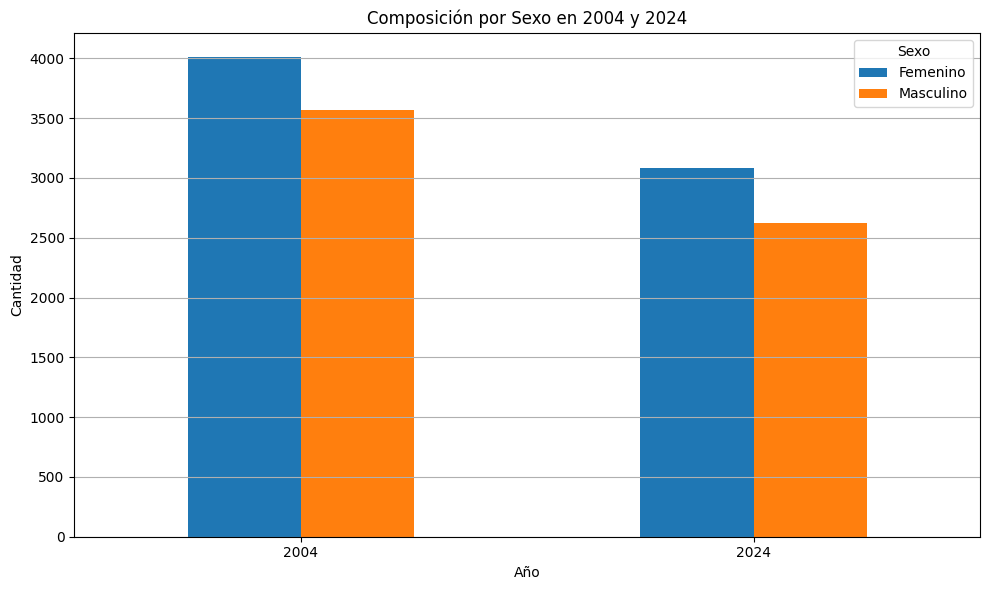

                              codusu ch04   año       sexo
0                           125098      1  2004  Masculino
2                           125515      2  2004   Femenino
3                           125558      1  2004  Masculino
4                           125558      2  2004   Femenino
5                           125558      2  2004   Femenino
...                              ...  ...   ...        ...
14690  TQRMNOSXVHJKKMCDEIJAH00794775    1  2024  Masculino
14694  TQRMNOPUQHKMKNCDEIJAH00861661    1  2024  Masculino
14695  TQRMNOPUQHKMKNCDEIJAH00861661    1  2024  Masculino
14696  TQRMNOPUQHKMKNCDEIJAH00861661    1  2024  Masculino
14697  TQRMNOPUQHKMKNCDEIJAH00861661    2  2024   Femenino

[13284 rows x 4 columns]


In [11]:
# Base de datos temporal con sexo y año para graficar -- df_temp


# Crear una nueva columna 'año' en un DataFrame temporal
df_temp = df[['codusu', 'ch04']].copy()
df_temp['año'] = df_temp['codusu'].apply(lambda x: 2024 if isinstance(x, str) and any(char.isalpha() for char in x) else 2004) #encontramos los años dependiendo de como este escrita la columna CODUSU

# Mapeamos los valores de ch04 a etiquetas de sexo
sexo_map = {1: 'Masculino', 2: 'Femenino'}
df_temp['sexo'] = df_temp['ch04'].map(sexo_map)

# Contar la cantidad de personas por sexo y año
composicion_sexo = df_temp.groupby(['año', 'sexo']).size().unstack(fill_value=0)

# Crear el gráfico de barras
composicion_sexo.plot(kind='bar', figsize=(10, 6))

# Añadir etiquetas y título
plt.title('Composición por Sexo en 2004 y 2024')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  # Para que las etiquetas del eje x estén horizontales
plt.legend(title='Sexo')
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

print(df_temp)

### Matrices de correlación

### DATA FRAME A UTILIZAR

df_2004 --> BASE LIMPIA DE 2004 PARA MATRIZ. OBTENIDA DE df (Completo) TIENEN DUMMY

df_2024 --> BASE LIMPIA DE 2024 PARA MATRIZ. OBTENIDA DE df (Completo) TIENEN DUMMY

df --> BASE LIMPIA COMPLETA (2004 Y 2024 con datos numéricos y misma cantidad de columnas)

In [12]:
# Filtra el DataFrame para obtener solo las filas donde codusu no contenga letras (año 2004)
df_2004 = df[df['ano4'] == 2004.0]

# Filtra el DataFrame para obtener solo las filas donde ano4 sea 2024.0
df_2024 = df[df['ano4'] == 2024.0]

In [13]:
# Seleccionar las columnas relevantes CON LAS QUE SE VA A TRABAJAR EN LA MATRIZ (y mas adelante en predicion)
columnas_relevantes = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']
df_2024 = df_2024[columnas_relevantes]
df_2004 = df_2004[columnas_relevantes]


### Matriz 2024

In [14]:
# SE CAMBIA LA BASE USANDO DUMMY PARA PODER INTERPRETAR LA MATRIZ

df_2024 = pd.get_dummies(df_2024, columns=['ch04', 'ch07', 'ch08', 'nivel_ed'], 
                          prefix=['sexo', 'estado_civil', 'cobertura', 'educacion'], 
                          drop_first=False).astype(int) 

df_2024 = df_2024.rename(columns={
    'ch06': 'edad',
    'ipcf': 'ingreso'
})


# ---------------- SEXO -------------------
df_2024 = df_2024.rename(columns={'sexo_1': 'varon', 'sexo_2': 'mujer'})
# df_2024 = df_dummies.rename(columns={'estado_civil_1': 'unido','estado_civil_2': 'casado', 'estado_civil_3': 'separado','estado_civil_4': 'viudo', 'estado_civil_5': 'soltero'})


# ---------------- ESTADO CIVIL -------------------

df_2024['con_pareja'] = ((df_2024['estado_civil_1'] == 1) | (df_2024['estado_civil_2'] == 1)).astype(int)

# Crear columna 'sin_pareja' (1 si estado_civil_3, estado_civil_4 o estado_civil_5 son 1, 0 en caso contrario)
df_2024['sin_pareja'] = ((df_2024['estado_civil_3'] == 1) | 
                             (df_2024['estado_civil_4'] == 1) | 
                             (df_2024['estado_civil_5'] == 1)).astype(int)
df_2024 = df_2024.drop(columns=['estado_civil_1', 'estado_civil_2', 'estado_civil_3', 'estado_civil_4', 'estado_civil_5'])


# ---------------- COBERTURA -------------------

df_2024['si_cobertura'] = ((df_2024['cobertura_1'] == 1) | 
                               (df_2024['cobertura_2'] == 1) | 
                               (df_2024['cobertura_3'] == 1) | 
                               (df_2024['cobertura_12'] == 1) | 
                               (df_2024['cobertura_13'] == 1) | 
                               (df_2024['cobertura_23'] == 1)).astype(int)

df_2024['no_cobertura'] = ((df_2024['cobertura_4'] == 1).astype(int))
#df_2024['ns_cobertura'] = ((df_2024['cobertura_9'] == 1).astype(int))
df_2024 = df_2024.drop(columns=['cobertura_1', 'cobertura_2', "cobertura_4", 'cobertura_3', 'cobertura_9', 'cobertura_12', 'cobertura_13',  "cobertura_23"])


# ---------------- EDUCACIÓN -------------------

# Crear columna 'prim_inc' (1 si educación_1 es 1, 0 en caso contrario)
df_2024['prim_inc'] = (df_2024['educacion_1'] == 1).astype(int)
# Crear columna 'prim_com' (1 si educación_2 es 1, 0 en caso contrario)
df_2024['prim_com'] = (df_2024['educacion_2'] == 1).astype(int)
# Crear columna 'sec_inc' (1 si educación_3 es 1, 0 en caso contrario)
df_2024['sec_inc'] = (df_2024['educacion_3'] == 1).astype(int)
# Crear columna 'sec_com' (1 si educación_4 es 1, 0 en caso contrario)
df_2024['sec_com'] = (df_2024['educacion_4'] == 1).astype(int)
# Crear columna 'uni_inc' (1 si educación_5 es 1, 0 en caso contrario)
df_2024['uni_inc'] = (df_2024['educacion_5'] == 1).astype(int)
# Crear columna 'uni_comp' (1 si educación_6 es 1, 0 en caso contrario)
df_2024['uni_comp'] = (df_2024['educacion_6'] == 1).astype(int)
# Crear columna 'sin_instrucc' (1 si educación_7 es 1, 0 en caso contrario)
df_2024['sin_instrucc'] = (df_2024['educacion_7'] == 1).astype(int)
# Crear columna 'ns_instrucc' (1 si educación_9 es 1, 0 en caso contrario)
#['ns_instrucc'] = (df_2024['educacion_9'] == 1).astype(int)
# Eliminar las columnas de educación originales
df_2024 = df_2024.drop(columns=['educacion_1', 'educacion_2', 'educacion_3', 
                                       'educacion_4', 'educacion_5', 
                                       'educacion_6', 'educacion_7', 
                                       ])
# Se llenan las etapas anteriores como completada si se completa una etapa superior
df_2024.loc[(df_2024['uni_comp'] == 1) | (df_2024['sec_com'] == 1), 'prim_com'] = 1
# Si tiene 'sec_inc' (secundario incompleto) y 'uni_inc' (universitario incompleto), poner 1 en 'prim_com'
df_2024.loc[(df_2024['sec_inc'] == 1) | (df_2024['uni_inc'] == 1), 'prim_com'] = 1
# Si tiene 'uni_comp' (universitario completo) o 'uni_inc' (universitario incompleto), poner 1 en 'sec_com'
df_2024.loc[(df_2024['uni_comp'] == 1) | (df_2024['uni_inc'] == 1), 'sec_com'] = 1



# ---------------- ESTADO -------------------

df_2024['estado'] = df_2024['estado'].replace({
    1: 'ocupado',
    2: 'desocupado',
    3: 'inactivo',
    4: 'menor de 10 años',
    0: 'no respuesta'
})

# Concatenar las columnas dummy al DataFrame original
df_2024 = pd.concat([df_2024,  pd.get_dummies(df_2024['estado'], prefix='estado').astype(int)], axis=1)
df_2024 = df_2024.drop(columns=['estado'])

df_2024['cat_inac'] = df_2024['cat_inac'].replace({
    1: 'jubilado/pensionado',
    2: 'rentista',
    3: 'estudiante',
    4: 'ama de casa',
    5: 'menor de 6 años',
    6: 'discapacitado',
    7: 'otros'
})


# ---------------- INACTIVIDAD -------------------

# Convertir la columna 'categoria_inactividad' en variables dummy
dummies_inactividad = pd.get_dummies(df_2024['cat_inac'], prefix='inactividad').astype(int) 

# Concatenar las columnas dummy al DataFrame original
df_2024 = pd.concat([df_2024, dummies_inactividad], axis=1)
df_2024 = df_2024.drop(columns=['cat_inac', "inactividad_0"]) #inac0.0 NO TIENE CODIGO 



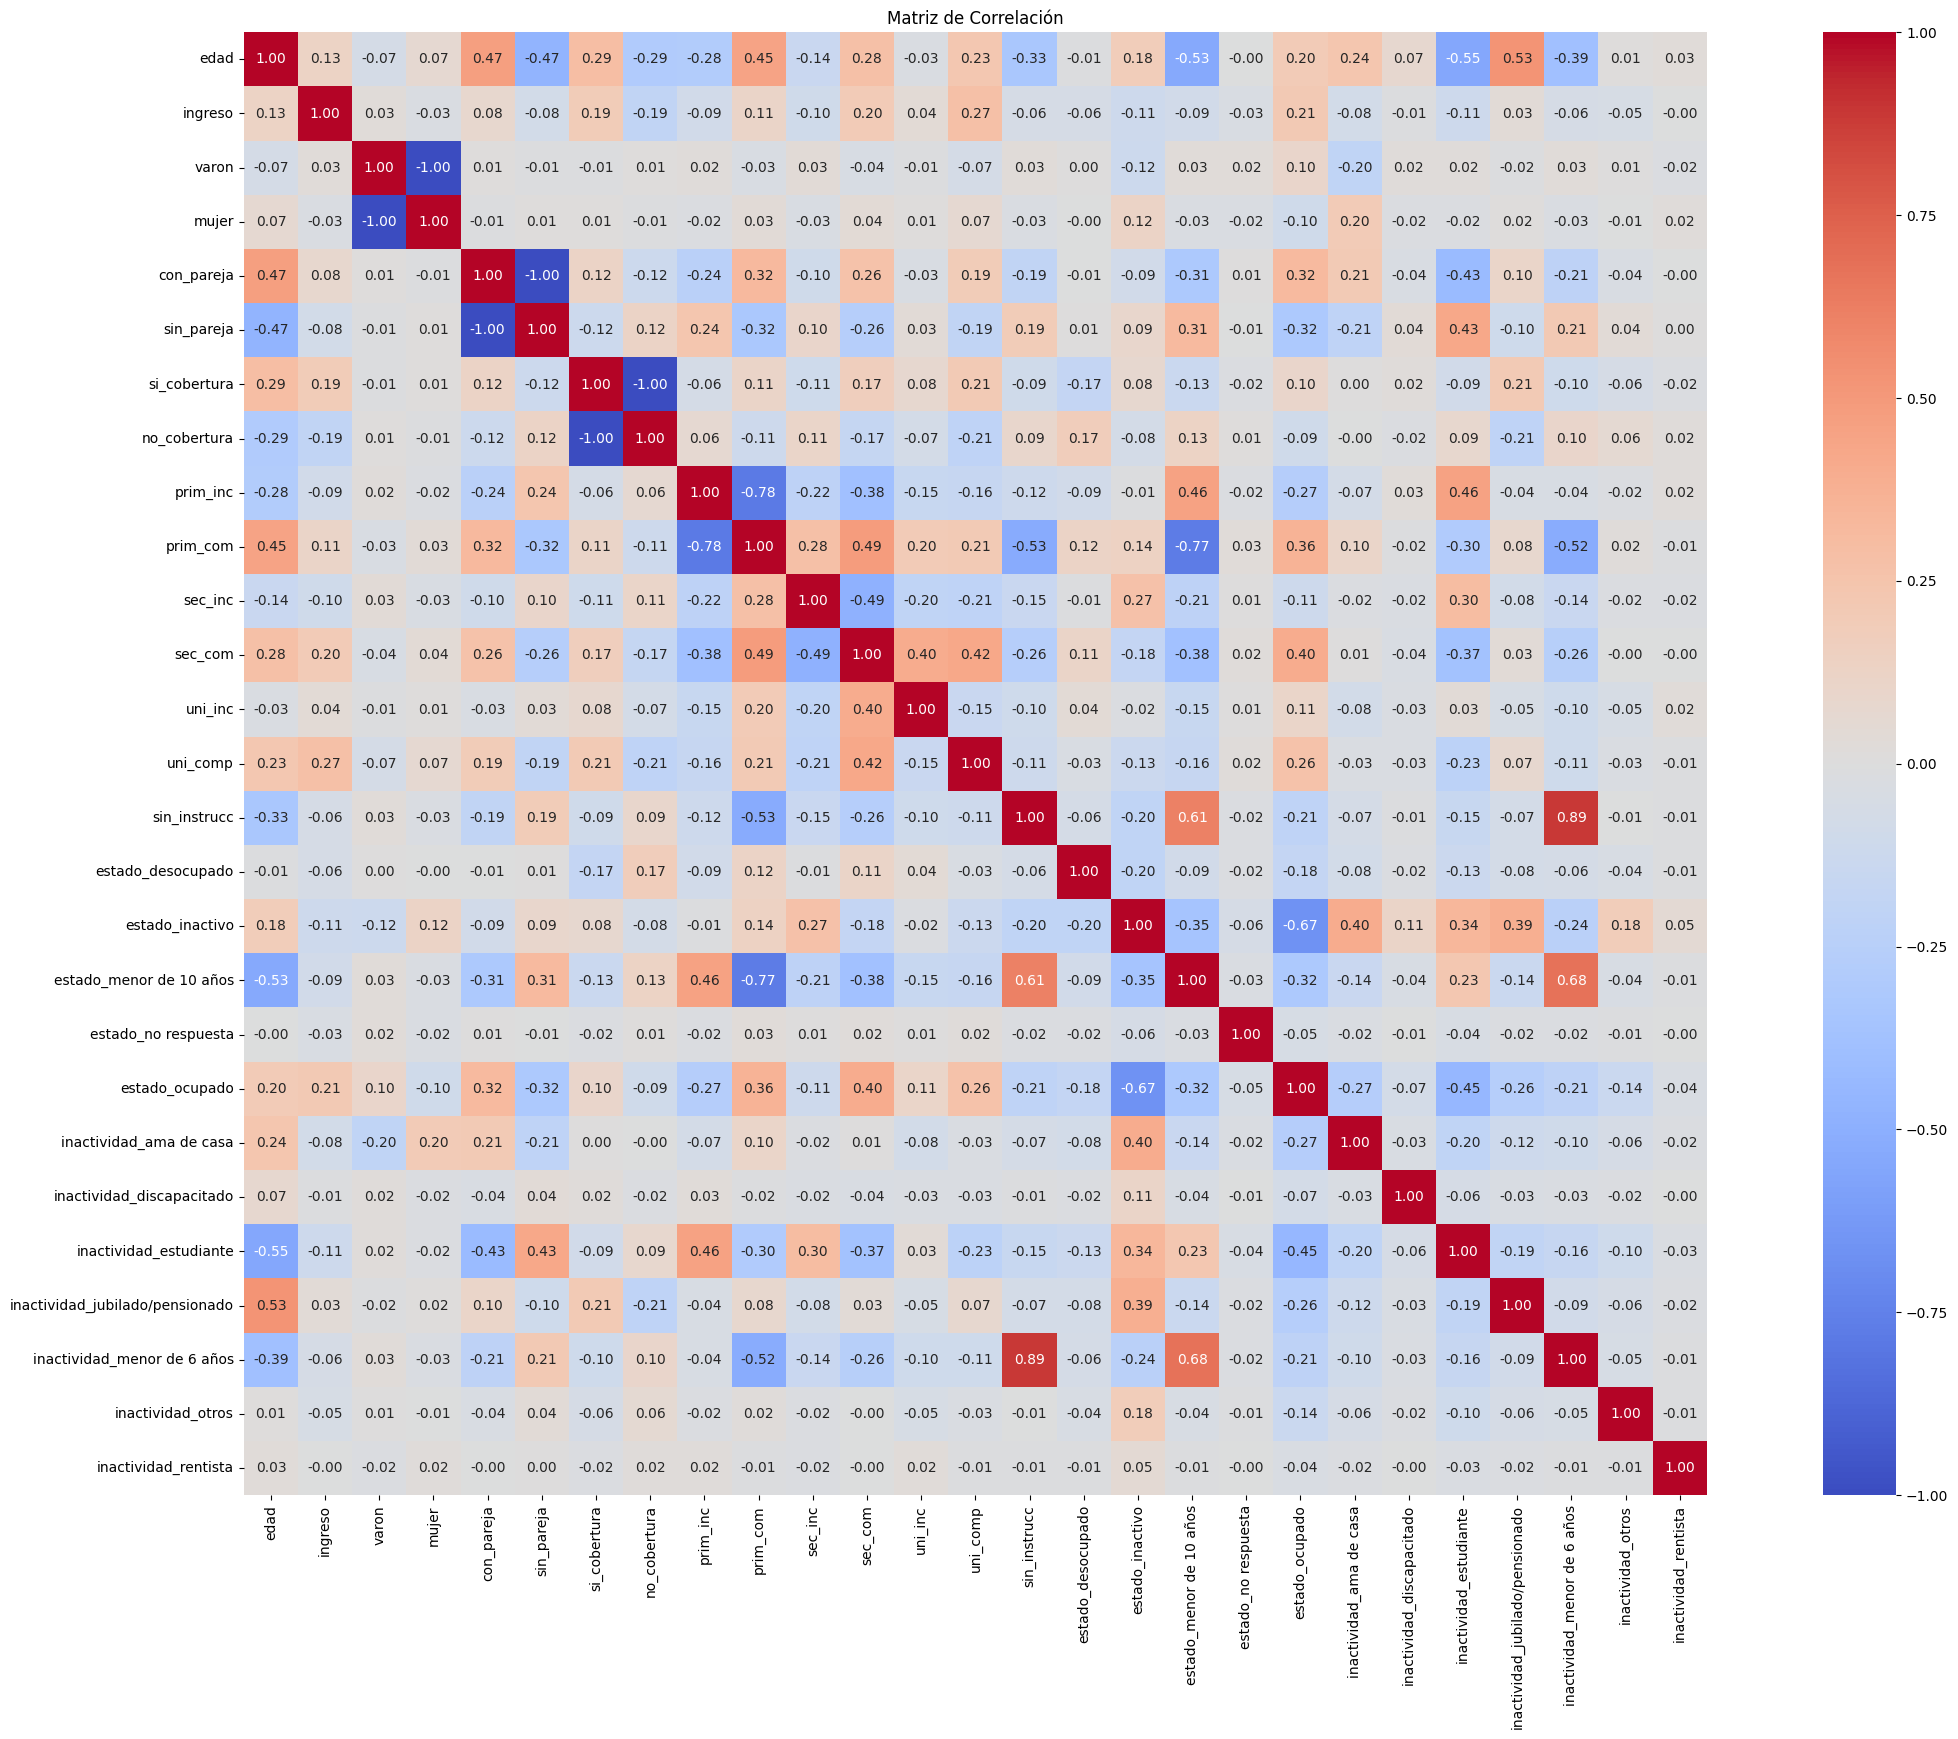

['edad', 'ingreso', 'varon', 'mujer', 'con_pareja', 'sin_pareja', 'si_cobertura', 'no_cobertura', 'prim_inc', 'prim_com', 'sec_inc', 'sec_com', 'uni_inc', 'uni_comp', 'sin_instrucc', 'estado_desocupado', 'estado_inactivo', 'estado_menor de 10 años', 'estado_no respuesta', 'estado_ocupado', 'inactividad_ama de casa', 'inactividad_discapacitado', 'inactividad_estudiante', 'inactividad_jubilado/pensionado', 'inactividad_menor de 6 años', 'inactividad_otros', 'inactividad_rentista']


In [15]:
columnas_a_categoricas = [
    'varon', 'mujer', 'con_pareja', 'sin_pareja', 
    'si_cobertura', 'no_cobertura', 'prim_inc', 
    'prim_com', 'sec_inc', 'sec_com', 'uni_inc', 
    'uni_comp', 'sin_instrucc', 'estado_desocupado', 
    'estado_inactivo', 'estado_menor de 10 años', 
    'estado_no respuesta', 'estado_ocupado', 
    'inactividad_ama de casa', 'inactividad_discapacitado', 
    'inactividad_estudiante', 'inactividad_jubilado/pensionado', 
    'inactividad_menor de 6 años', 'inactividad_otros', 
    'inactividad_rentista'
]
# Convertir cada columna a categórica
for columna in columnas_a_categoricas:
        df_2024[columna] = pd.Categorical(df_2024[columna])


matriz_correlacion = df_2024.corr()

# Crear un gráfico de calor para la matriz de correlación
plt.figure(figsize=(30, 19))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de Correlación')
plt.show()
print(df_2024.columns.tolist())

In [16]:
# Nos aseguramos que sean categoricas
#df_2024 
print(df_2024.dtypes)

edad                                  int32
ingreso                               int32
varon                              category
mujer                              category
con_pareja                         category
sin_pareja                         category
si_cobertura                       category
no_cobertura                       category
prim_inc                           category
prim_com                           category
sec_inc                            category
sec_com                            category
uni_inc                            category
uni_comp                           category
sin_instrucc                       category
estado_desocupado                  category
estado_inactivo                    category
estado_menor de 10 años            category
estado_no respuesta                category
estado_ocupado                     category
inactividad_ama de casa            category
inactividad_discapacitado          category
inactividad_estudiante          

### Matriz 2004

In [17]:
# SE CAMBIA LA BASE USANDO DUMMY PARA PODER INTERPRETAR LA MATRIZ

df_2004 = pd.get_dummies(df_2004, columns=['ch04', 'ch07', 'ch08', 'nivel_ed'], 
                          prefix=['sexo', 'estado_civil', 'cobertura', 'educacion'], 
                          drop_first=False).astype(int) 

df_2004 = df_2004.rename(columns={
    'ch06': 'edad',
    'ipcf': 'ingreso'
})


# ---------------- SEXO -------------------
df_2004 = df_2004.rename(columns={'sexo_1': 'varon', 'sexo_2': 'mujer'})
# df_2004 = df_dummies.rename(columns={'estado_civil_1': 'unido','estado_civil_2': 'casado', 'estado_civil_3': 'separado','estado_civil_4': 'viudo', 'estado_civil_5': 'soltero'})


# ---------------- ESTADO CIVIL -------------------

df_2004['con_pareja'] = ((df_2004['estado_civil_1'] == 1) | (df_2004['estado_civil_2'] == 1)).astype(int)

# Crear columna 'sin_pareja' (1 si estado_civil_3, estado_civil_4 o estado_civil_5 son 1, 0 en caso contrario)
df_2004['sin_pareja'] = ((df_2004['estado_civil_3'] == 1) | 
                             (df_2004['estado_civil_4'] == 1) | 
                             (df_2004['estado_civil_5'] == 1)).astype(int)
df_2004 = df_2004.drop(columns=['estado_civil_1', 'estado_civil_2', 'estado_civil_3', 'estado_civil_4', 'estado_civil_5'])


# ---------------- COBERTURA -------------------

df_2004['si_cobertura'] = ((df_2004['cobertura_1'] == 1) | 
                               (df_2004['cobertura_2'] == 1) | 
                               (df_2004['cobertura_3'] == 1) | 
                               (df_2004['cobertura_12'] == 1) | 
                             #  (df_2004['cobertura_13'] == 1) | 
                               (df_2004['cobertura_23'] == 1)).astype(int)

df_2004['no_cobertura'] = ((df_2004['cobertura_4'] == 1).astype(int))
#df_2004['ns_cobertura'] = ((df_2004['cobertura_9'] == 1).astype(int))
df_2004 = df_2004.drop(columns=['cobertura_1', 'cobertura_2', "cobertura_4", 'cobertura_3', 'cobertura_9', 'cobertura_12', "cobertura_23"])


# ---------------- EDUCACIÓN -------------------

# Crear columna 'prim_inc' (1 si educación_1 es 1, 0 en caso contrario)
df_2004['prim_inc'] = (df_2004['educacion_1'] == 1).astype(int)
# Crear columna 'prim_com' (1 si educación_2 es 1, 0 en caso contrario)
df_2004['prim_com'] = (df_2004['educacion_2'] == 1).astype(int)
# Crear columna 'sec_inc' (1 si educación_3 es 1, 0 en caso contrario)
df_2004['sec_inc'] = (df_2004['educacion_3'] == 1).astype(int)
# Crear columna 'sec_com' (1 si educación_4 es 1, 0 en caso contrario)
df_2004['sec_com'] = (df_2004['educacion_4'] == 1).astype(int)
# Crear columna 'uni_inc' (1 si educación_5 es 1, 0 en caso contrario)
df_2004['uni_inc'] = (df_2004['educacion_5'] == 1).astype(int)
# Crear columna 'uni_comp' (1 si educación_6 es 1, 0 en caso contrario)
df_2004['uni_comp'] = (df_2004['educacion_6'] == 1).astype(int)
# Crear columna 'sin_instrucc' (1 si educación_7 es 1, 0 en caso contrario)
df_2004['sin_instrucc'] = (df_2004['educacion_7'] == 1).astype(int)
# Crear columna 'ns_instrucc' (1 si educación_9 es 1, 0 en caso contrario)
#['ns_instrucc'] = (df_2004['educacion_9'] == 1).astype(int)
# Eliminar las columnas de educación originales
df_2004 = df_2004.drop(columns=['educacion_1', 'educacion_2', 'educacion_3', 
                                       'educacion_4', 'educacion_5', 
                                       'educacion_6', 'educacion_7', 
                                       ])
# Se llenan las etapas anteriores como completada si se completa una etapa superior
df_2004.loc[(df_2004['uni_comp'] == 1) | (df_2004['sec_com'] == 1), 'prim_com'] = 1
# Si tiene 'sec_inc' (secundario incompleto) y 'uni_inc' (universitario incompleto), poner 1 en 'prim_com'
df_2004.loc[(df_2004['sec_inc'] == 1) | (df_2004['uni_inc'] == 1), 'prim_com'] = 1
# Si tiene 'uni_comp' (universitario completo) o 'uni_inc' (universitario incompleto), poner 1 en 'sec_com'
df_2004.loc[(df_2004['uni_comp'] == 1) | (df_2004['uni_inc'] == 1), 'sec_com'] = 1



# ---------------- ESTADO -------------------

df_2004['estado'] = df_2004['estado'].replace({
    1: 'ocupado',
    2: 'desocupado',
    3: 'inactivo',
    4: 'menor de 10 años',
    0: 'no respuesta'
})

# Concatenar las columnas dummy al DataFrame original
df_2004 = pd.concat([df_2004,  pd.get_dummies(df_2004['estado'], prefix='estado').astype(int)], axis=1)
df_2004 = df_2004.drop(columns=['estado'])

df_2004['cat_inac'] = df_2004['cat_inac'].replace({
    1: 'jubilado/pensionado',
    2: 'rentista',
    3: 'estudiante',
    4: 'ama de casa',
    5: 'menor de 6 años',
    6: 'discapacitado',
    7: 'otros'
})


# ---------------- INACTIVIDAD -------------------

# Convertir la columna 'categoria_inactividad' en variables dummy
dummies_inactividad = pd.get_dummies(df_2004['cat_inac'], prefix='inactividad').astype(int) 

# Concatenar las columnas dummy al DataFrame original
df_2004 = pd.concat([df_2004, dummies_inactividad], axis=1)
df_2004 = df_2004.drop(columns=['cat_inac', "inactividad_0"]) #inac0.0 NO TIENE CODIGO 


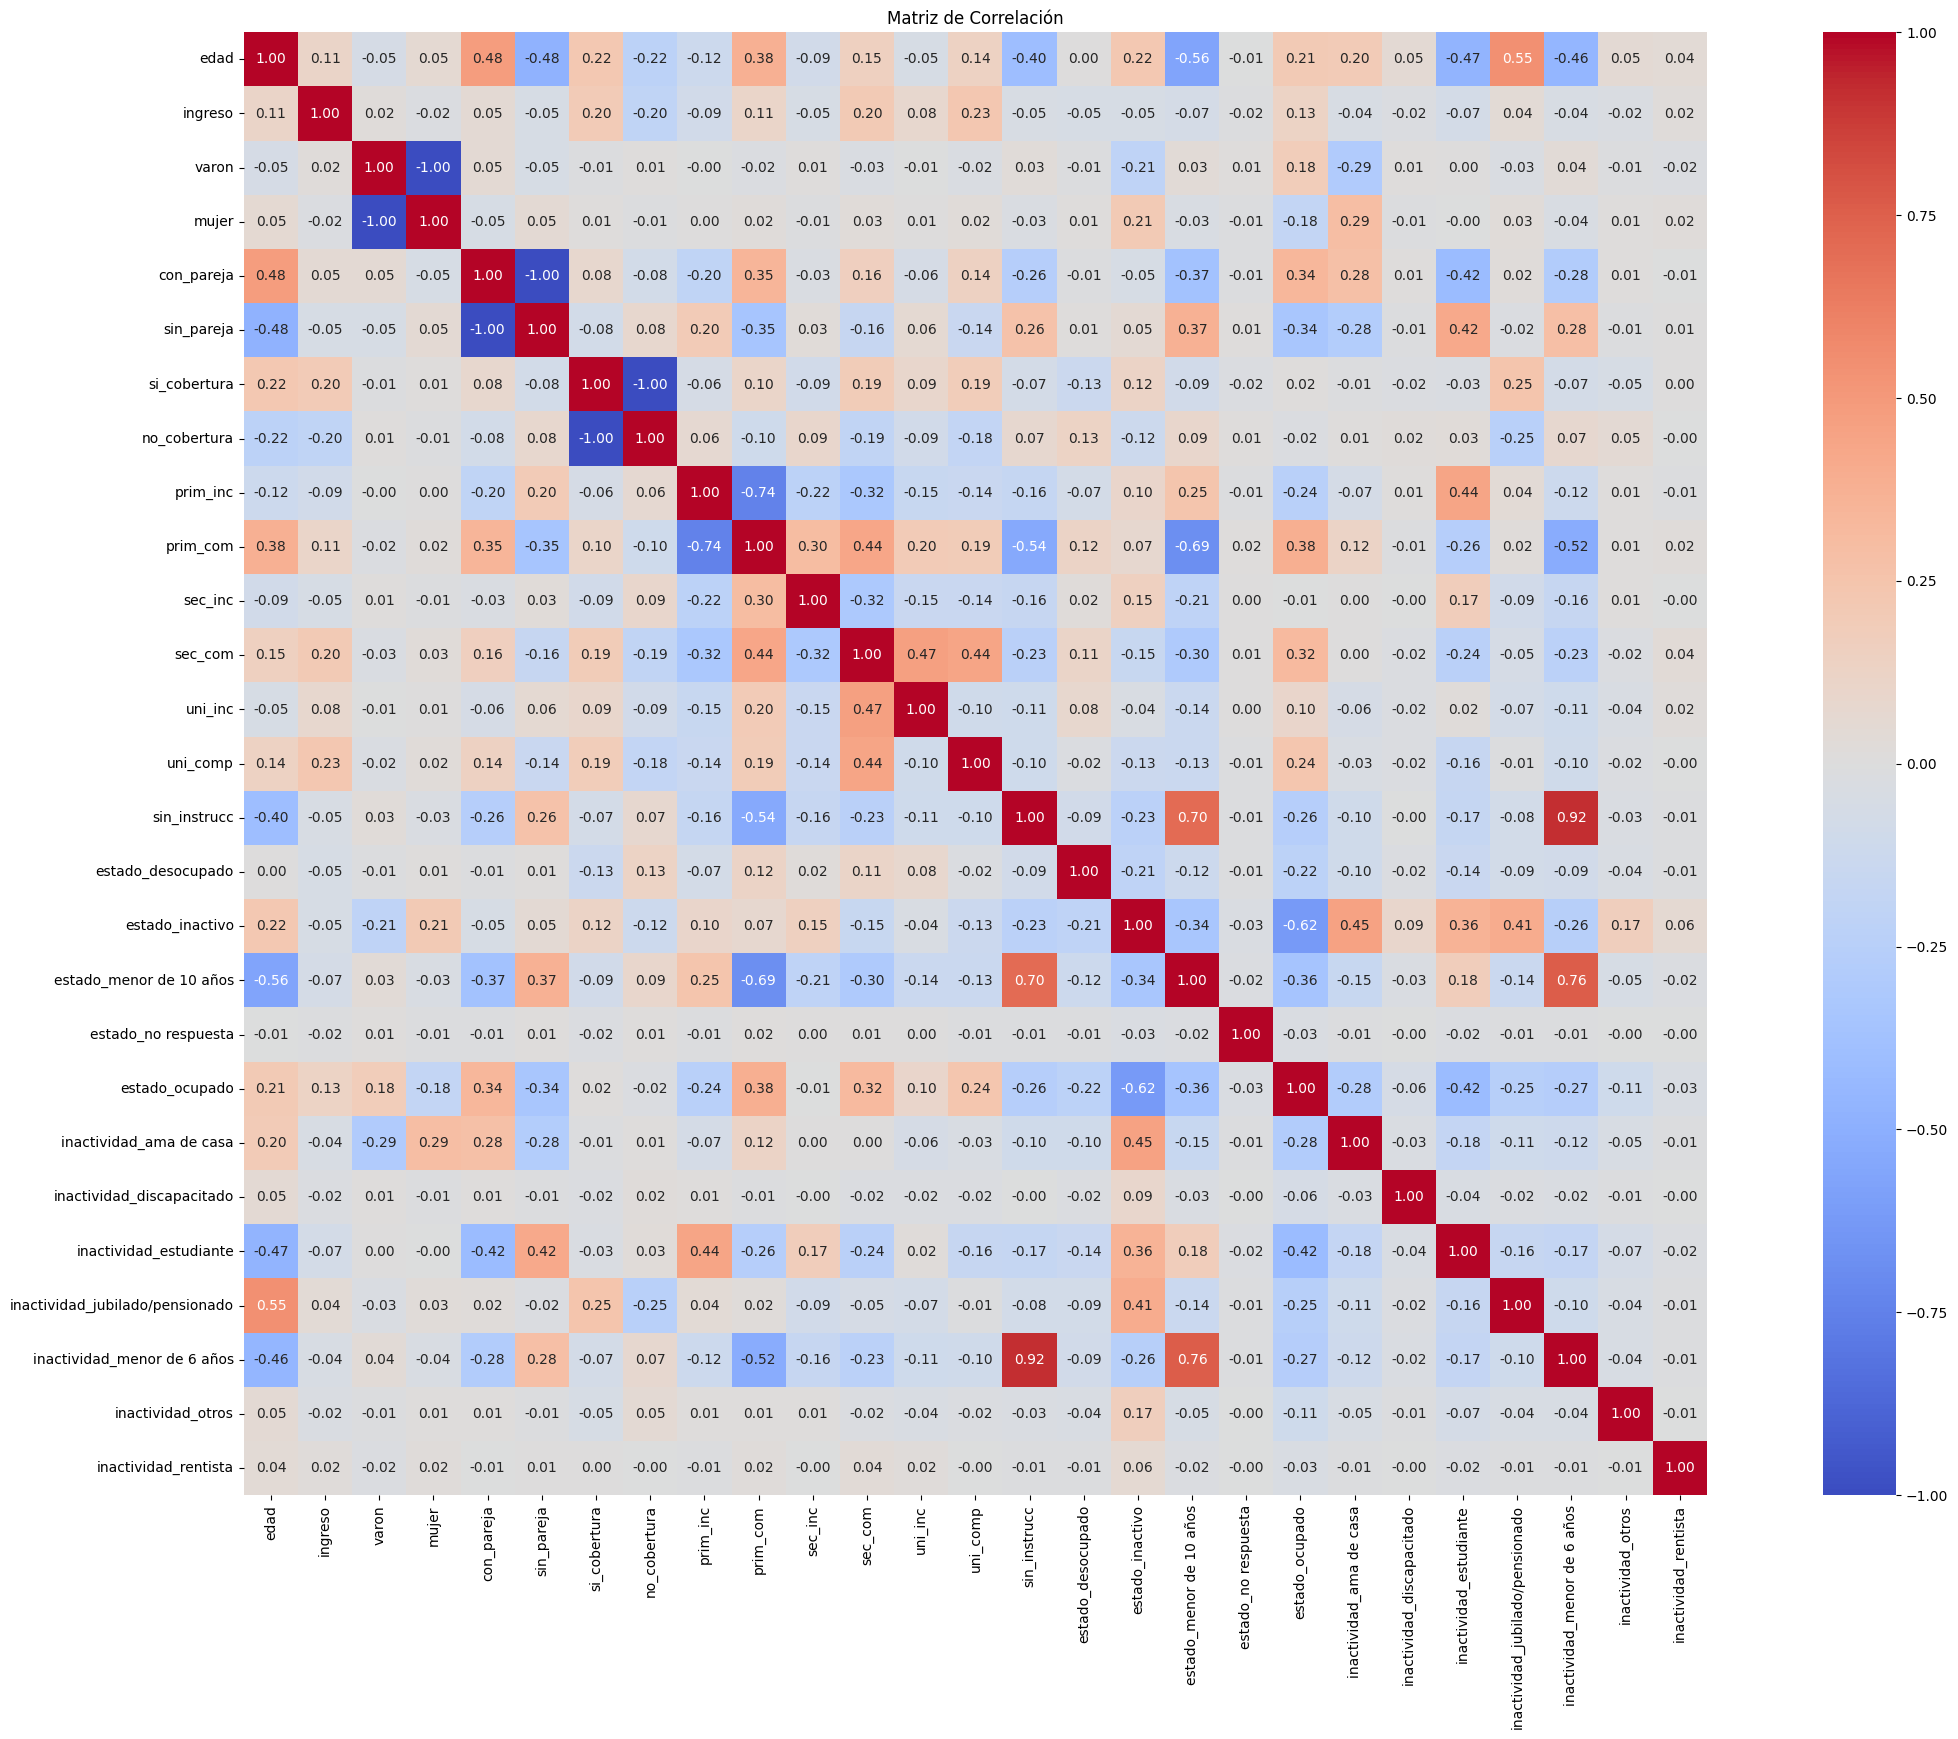

['edad', 'ingreso', 'varon', 'mujer', 'con_pareja', 'sin_pareja', 'si_cobertura', 'no_cobertura', 'prim_inc', 'prim_com', 'sec_inc', 'sec_com', 'uni_inc', 'uni_comp', 'sin_instrucc', 'estado_desocupado', 'estado_inactivo', 'estado_menor de 10 años', 'estado_no respuesta', 'estado_ocupado', 'inactividad_ama de casa', 'inactividad_discapacitado', 'inactividad_estudiante', 'inactividad_jubilado/pensionado', 'inactividad_menor de 6 años', 'inactividad_otros', 'inactividad_rentista']


In [18]:
columnas_a_categoricas = [
    'varon', 'mujer', 'con_pareja', 'sin_pareja', 
    'si_cobertura', 'no_cobertura', 'prim_inc', 
    'prim_com', 'sec_inc', 'sec_com', 'uni_inc', 
    'uni_comp', 'sin_instrucc', 'estado_desocupado', 
    'estado_inactivo', 'estado_menor de 10 años', 
    'estado_no respuesta', 'estado_ocupado', 
    'inactividad_ama de casa', 'inactividad_discapacitado', 
    'inactividad_estudiante', 'inactividad_jubilado/pensionado', 
    'inactividad_menor de 6 años', 'inactividad_otros', 
    'inactividad_rentista'
]

# Convertir cada columna a categórica
for columna in columnas_a_categoricas:
        df_2004[columna] = pd.Categorical(df_2004[columna])


# Calcular la matriz de correlación
matriz_correlacion = df_2004.corr()

# Crear un gráfico de calor para la matriz de correlación
plt.figure(figsize=(30, 19))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de Correlación')
plt.show()
print(df_2004.columns.tolist())

In [19]:
df_2004
#print(df_2004.dtypes)

,edad,ingreso,varon,mujer,con_pareja,sin_pareja,si_cobertura,no_cobertura,prim_inc,prim_com,...,estado_menor de 10 años,estado_no respuesta,estado_ocupado,inactividad_ama de casa,inactividad_discapacitado,inactividad_estudiante,inactividad_jubilado/pensionado,inactividad_menor de 6 años,inactividad_otros,inactividad_rentista
0,79,368,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,74,440,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,54,532,1,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,51,532,0,1,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5,25,532,0,1,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,1,533,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7643,51,100,1,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
7644,55,100,0,1,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
7645,12,100,0,1,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


### Cantidad de desocupados

In [20]:
#averiguar cuantos desocupados hay en la muestra --> estado=desocupado (2)

desocupados= (df['estado']==2).sum()
print(f'la cantidad de desocupados es: {desocupados}')

inactivo= (df['estado']==3).sum()
print(f'la cantidad de inactivos es: {inactivo}')


la cantidad de desocupados es: 809
la cantidad de inactivos es: 5249


### Media de Ingresos por estado

In [21]:
# Se calcula la media de ingresos para cada cada estado

media_ingresos=df.groupby('estado')['ipcf'].mean().reset_index()
media_ingresos

,estado,ipcf
0,0,14.198198
1,1,129539.579343
2,2,32829.850087
3,3,66454.590662
4,4,41675.196705


### Personas Economicamente activas (PEA)

Condición de actividad
0 = Entrevista individual no realizada
 (no respuesta al cuestionario
 individual)
1 = Ocupado
2 = Desocupado
3 = Inactivo
4 = Menor de 10 años

Para saber cuales no respondieron tiene que ser 0


df['estado'] = df['estado'].replace ('Entrevista individual no realizada', 0)

df['estado'] = df['estado'].replace ('Ocupado', 1)

df['estado'] = df['estado'].replace ('Desocupado', 2)

df['estado'] = df['estado'].replace ('Inactivo', 3)

df['estado'] = df['estado'].replace ('Menor de 10 años', 4)

df['estado'] = df['estado'].replace ("Entrevista individual no realizada (no respuesta al cuestion", 0)


#### DATA FRAME A UTILIZAR

respondieron  -->  BASE LIMPIA COMPLETA (2004 Y 2024 con datos numéricos y misma cantidad de columnas QUE CONTIENE GENTE QUE RESPONDIO CUAL ES SU ESTADO) / se agrega columna PEA / después se agrega PET. Luego se agrega DESOCUPADOS

norespondieron  --> BASE LIMPIA COMPLETA (2004 Y 2024 con datos numéricos y misma cantidad de columnas QUE CONTIENE GENTE QUE NO RESPONDIO CUAL ES SU ESTADO): SON 37. NO contiene PET, PEA

df --> BASE LIMPIA COMPLETA (2004 Y 2024 con datos numéricos y misma cantidad de columnas)

#### Comparaciones PEA (Población Económicamente activa)

In [22]:
#CREAMOS LOS DF
cantidad_ceros = (df['estado'] == 0).sum()
print(f'Cantidad de personas que no respondieron a su condición de actividad (estado): {cantidad_ceros}')


#BASE DE DATOS RESPONDIERON / NORESPONDIERON
respondieron = df[df['estado'] != 0]

# Filtrar las observaciones donde no respondieron
norespondieron = df[df['estado'] == 0]

# LOS AÑOS PASAN DE FLOAT A ENTERO 
respondieron['ano4'] = respondieron['ano4'].astype(int)
norespondieron['ano4'] = norespondieron['ano4'].astype(int)

Cantidad de personas que no respondieron a su condición de actividad (estado): 37


C:\Users\luciv\AppData\Local\Temp\ipykernel_11968\119887548.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['ano4'] = respondieron['ano4'].astype(int)
C:\Users\luciv\AppData\Local\Temp\ipykernel_11968\119887548.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norespondieron['ano4'] = norespondieron['ano4'].astype(int)


In [23]:
# SE BUSCA POBLACION ACTIVA SI RESPONDIERON QUE ESTAN OCUPADOS O DESOCUPADOS 
respondieron.loc[:, 'PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)

C:\Users\luciv\AppData\Local\Temp\ipykernel_11968\3724959521.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  respondieron.loc[:, 'PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)
C:\Users\luciv\AppData\Local\Temp\ipykernel_11968\3724959521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.loc[:, 'PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)


In [24]:
respondieron

,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,pdecifr,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,PEA
0,125098,1.0,1.0,1,2004,1,1,S,32,1299.0,...,,01,368.0,07,,06,06,,04,0
2,125515,1.0,1.0,1,2004,1,1,S,32,1486.0,...,,02,440.0,07,,07,07,,05,0
3,125558,1.0,1.0,1,2004,1,1,S,32,1674.0,...,,08,532.5,08,,08,08,,06,1
4,125558,1.0,2.0,1,2004,1,1,S,32,1674.0,...,,08,532.5,08,,08,08,,06,0
5,125558,1.0,3.0,1,2004,1,1,S,32,1674.0,...,,08,532.5,08,,08,08,,06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14685,TQRMNORWVHLKOPCDEIIAD00861660,1.0,4,1,2024,1,1,S,32,590.0,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
14686,TQRMNORWVHLKOPCDEIIAD00861660,1.0,5,1,2024,1,1,S,32,590.0,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
14687,TQRMNORWVHLKOPCDEIIAD00861660,1.0,6,1,2024,1,1,S,32,590.0,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
14688,TQRMNOPSYHJLOQCDEIIAD00794774,1.0,1,1,2024,1,1,S,32,1376.0,...,NaN,7,910000.0,10,NaN,10,10.0,NaN,10,1


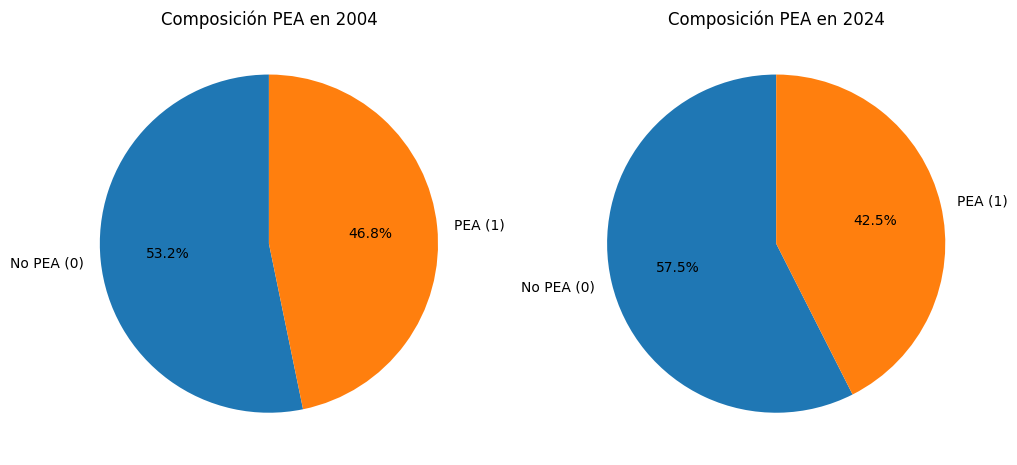

In [25]:
# calculamos PEA para base de datos respondieron.

# Contar la cantidad de PEA por año
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico para 2004
ax[0].pie(respondieron.groupby(['ano4', 'PEA']).size().unstack(fill_value=0).loc[2004.0], labels=['No PEA (0)', 'PEA (1)'], autopct='%1.1f%%', startangle=90)
ax[0].set_title('Composición PEA en 2004')

# Gráfico para 2024
ax[1].pie(respondieron.groupby(['ano4', 'PEA']).size().unstack(fill_value=0).loc[2024], labels=['No PEA (0)', 'PEA (1)'], autopct='%1.1f%%', startangle=90)
ax[1].set_title('Composición PEA en 2024')

plt.show()


PET          0          1
ano4                     
2004  3.672316  96.327684
2024  4.306418  95.693582


C:\Users\luciv\AppData\Local\Temp\ipykernel_11968\2919248996.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  respondieron['PET'] = np.where((respondieron["PEA"] == 1) & (respondieron["ch06"].between(15,65)),1,0)
C:\Users\luciv\AppData\Local\Temp\ipykernel_11968\2919248996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['PET'] = np.where((respondieron["PEA"] == 1) & (respondieron["ch06"].between(15,65)),1,0)


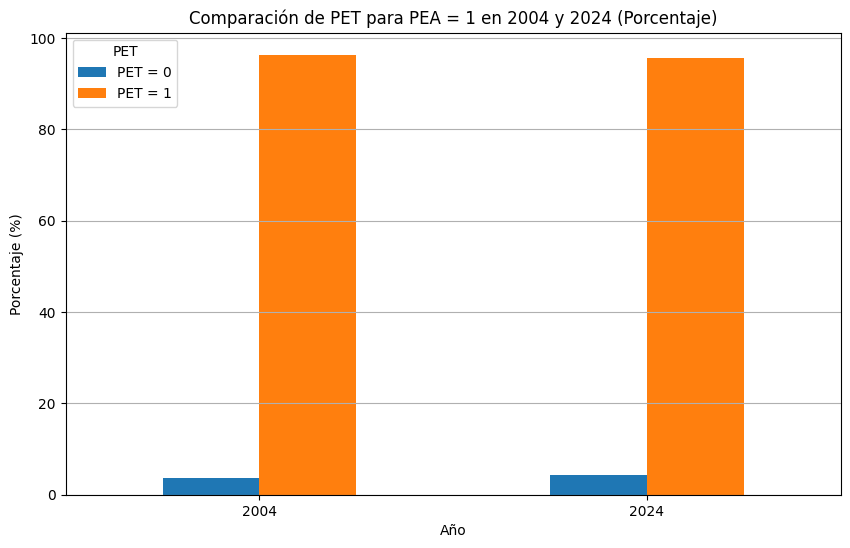

In [26]:
respondieron['PET'] = np.where((respondieron["PEA"] == 1) & (respondieron["ch06"].between(15,65)),1,0)
resultados = respondieron.groupby(['ano4', 'PET']).size().unstack(fill_value=0)

# Filtrar los datos  PEA = 1
data_filtered = respondieron[(respondieron['PEA'] == 1)]

# Contar PET = 1 y PET = 0 para cada año
resultados = data_filtered.groupby(['ano4', 'PET']).size().unstack(fill_value=0)

resultados_percentage = resultados.div(resultados.sum(axis=1), axis=0) * 100
print(resultados_percentage)

# Crear el gráfico de barras
resultados_percentage.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Comparación de PET para PEA = 1 en 2004 y 2024 (Porcentaje)')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Año')
plt.xticks(rotation=0)
plt.legend(title='PET', labels=['PET = 0', 'PET = 1'])
plt.grid(axis='y')
plt.show()

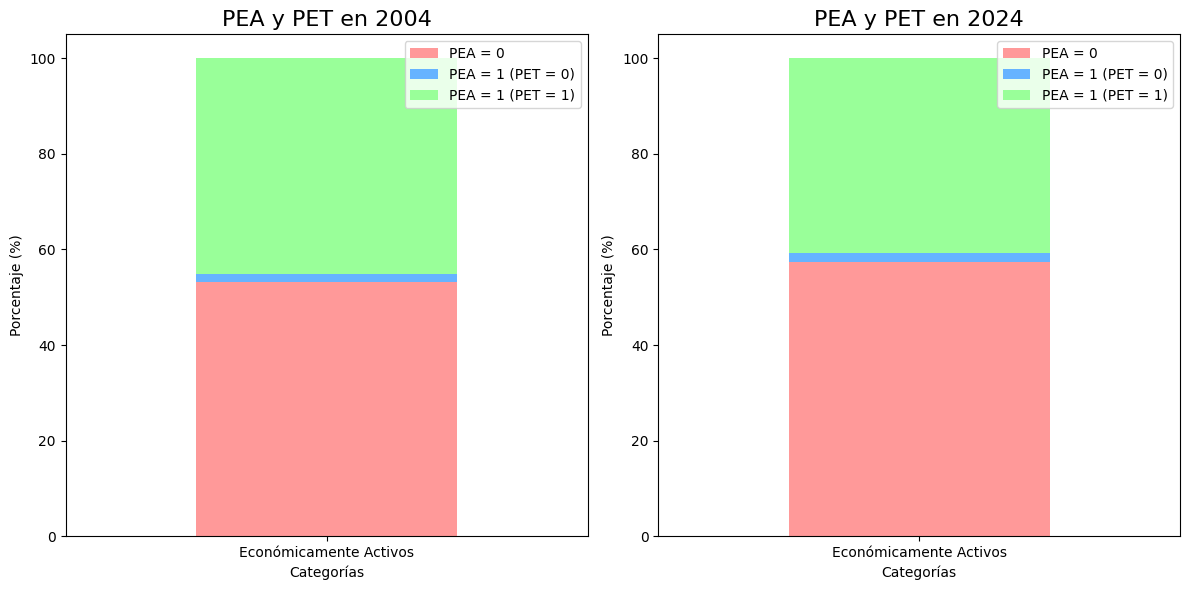

In [27]:
# SE COMPARAN LOS GRAFICOS DE PET Y PEA

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Iterar sobre los años
for i, year in enumerate([2004, 2024]):
    # Filtrar los datos para el año actual
    data_filtered = respondieron[respondieron['ano4'] == year]
    
    # Calcular la PEA (Económicamente Activos)
    pea_counts = data_filtered['PEA'].value_counts(normalize=True) * 100
    
    # Filtrar para PEA = 1 y calcular PET
    data_pea1 = data_filtered[data_filtered['PEA'] == 1]
    pet_counts = data_pea1['PET'].value_counts(normalize=True) * 100

    # Crear un DataFrame para los resultados
    results = pd.DataFrame({
        'PEA = 0': [pea_counts.get(0, 0)],
        'PEA = 1 (PET = 0)': [pet_counts.get(0, 0) * pea_counts.get(1, 0) / 100],
        'PEA = 1 (PET = 1)': [pet_counts.get(1, 0) * pea_counts.get(1, 0) / 100]
    })

    # Crear gráfico de barras apiladas
    results.plot(kind='bar', stacked=True, ax=axs[i], color=['#ff9999', '#66b3ff', '#99ff99'])
    
    # Añadir títulos y etiquetas
    axs[i].set_title(f'PEA y PET en {year}', fontsize=16)
    axs[i].set_ylabel('Porcentaje (%)')
    axs[i].set_xlabel('Categorías')
    axs[i].set_xticklabels(['Económicamente Activos'], rotation=0)

plt.tight_layout()
plt.show()

#### Desocupación

In [28]:
#Agregar una columna llamada desocupado que muestre personas desocupadas en 2004 vs 2024

#Se agraga columna de desocupado
respondieron['desocupado'] = respondieron['estado'].apply(lambda x: 1 if x in [2] else 0) 

des2004 = ((respondieron['desocupado'] == 1) & (respondieron['ano4'] == 2004)).sum()
print(f'La cantidad de desocupados en 2004 era: {des2004}')

des2024 = ((respondieron['desocupado'] == 1) & (respondieron['ano4'] == 2024)).sum()
print(f'La cantidad de desocupados en 2024 es: {des2024}')


La cantidad de desocupados en 2004 era: 528
La cantidad de desocupados en 2024 es: 281


C:\Users\luciv\AppData\Local\Temp\ipykernel_11968\3120623746.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  respondieron['desocupado'] = respondieron['estado'].apply(lambda x: 1 if x in [2] else 0)
C:\Users\luciv\AppData\Local\Temp\ipykernel_11968\3120623746.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['desocupado'] = respondieron['estado'].apply(lambda x: 1 if x in [2] else 0)


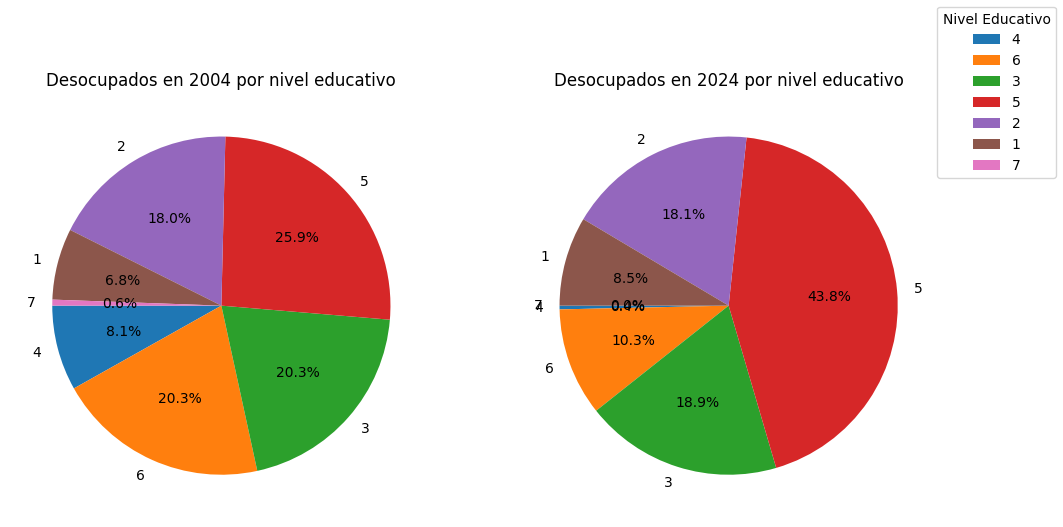

nivel_ed   1    2    3    4   5   6  7
ano4                                  
2004      43  107  107  137  95  36  3
2024       1   29   53  123  51  24  0


In [29]:
#Mostrar la proporción de desocupados por nivel educativos comparando 2004 y 2024
#Uso base de datos RESPONDIERON
rd = respondieron[respondieron['desocupado'] == 1]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ne = rd['nivel_ed'].unique()

# Gráfico para 2004
d2004 = rd.groupby(['ano4', 'nivel_ed']).size().unstack(fill_value=0).loc[2004]
ax[0].pie(d2004, labels=ne, autopct='%1.1f%%', startangle=180)
ax[0].set_title('Desocupados en 2004 por nivel educativo')

# Gráfico para 2024
d2024 = rd.groupby(['ano4', 'nivel_ed']).size().unstack(fill_value=0).loc[2024]
ax[1].pie(d2024, labels=ne, autopct='%1.1f%%', startangle=180)
ax[1].set_title('Desocupados en 2024 por nivel educativo')
fig.legend(ne, title="Nivel Educativo", loc="upper right")

plt.show()

r = rd.groupby(['ano4', 'nivel_ed']).size().unstack(fill_value=0)
print(r)


C:\Users\luciv\AppData\Local\Temp\ipykernel_11968\380282078.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rd['rango_edad'] = pd.cut(rd['ch06'], bins=bins, labels=labels, right=False)
C:\Users\luciv\AppData\Local\Temp\ipykernel_11968\380282078.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd['rango_edad'] = pd.cut(rd['ch06'], bins=bins, labels=labels, right=False)
C:\Users\luciv\AppData\Local\Temp\ipykernel_11968\380282078.py:11: FutureWarning: The default of observed=False is deprecated and will be changed

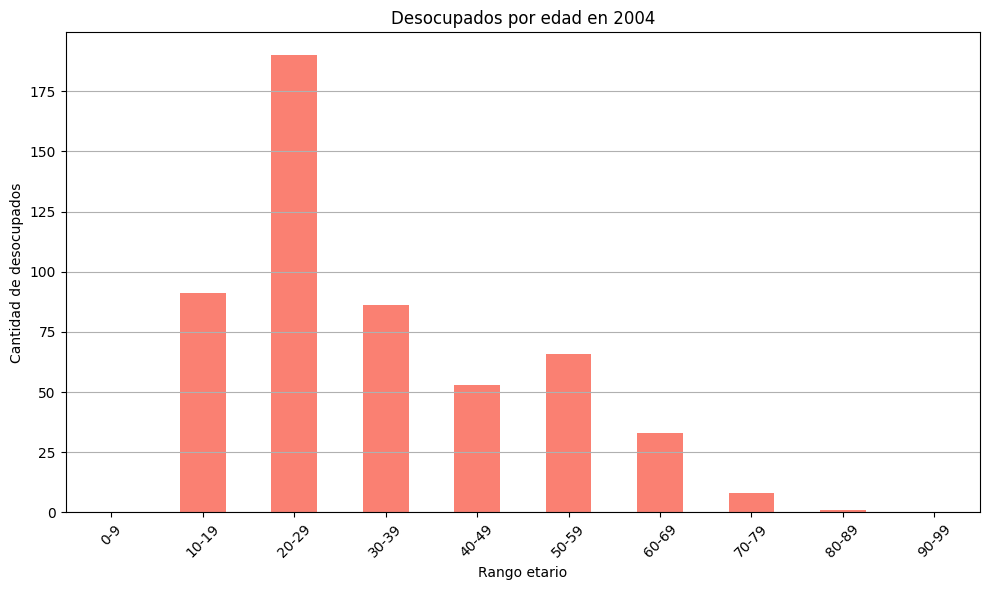

C:\Users\luciv\AppData\Local\Temp\ipykernel_11968\380282078.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado = rd[rd['ano4'] == year].groupby('rango_edad').size()


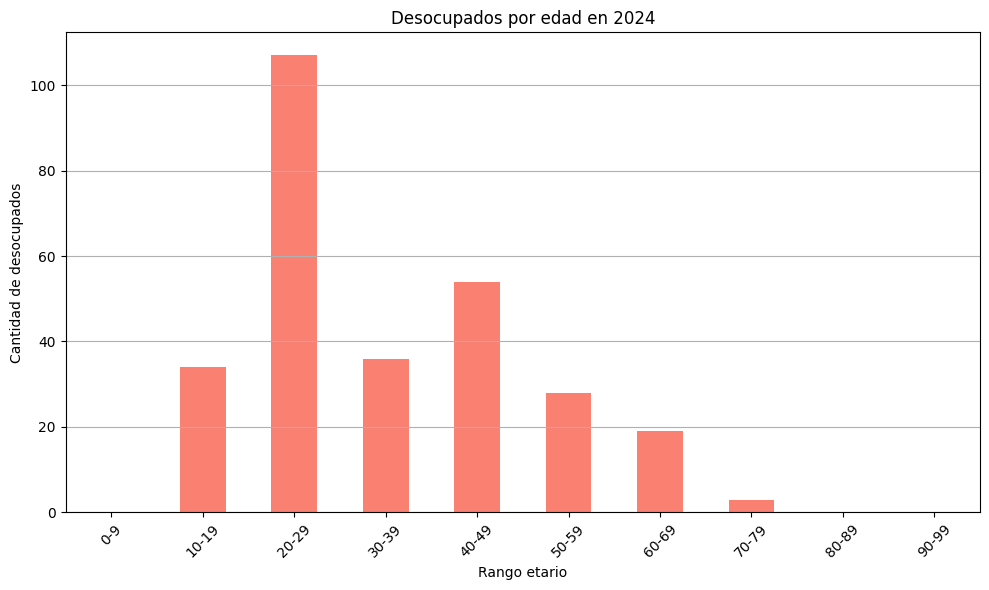

In [30]:
# rangos cada 10 años

bins = range(0, 101, 10)  
labels = [f'{i}-{i + 9}' for i in bins[:-1]]  

# Crear la columna de rango de edad
rd['rango_edad'] = pd.cut(rd['ch06'], bins=bins, labels=labels, right=False)

# Crear gráficos para cada año
for year in [2004, 2024]:
    resultado = rd[rd['ano4'] == year].groupby('rango_edad').size()

    # Crear gráfico de barras
    plt.figure(figsize=(10, 6))
    resultado.plot(kind='bar', color='salmon')
    plt.title(f'Desocupados por edad en {year}')
    plt.xlabel('Rango etario')
    plt.ylabel('Cantidad de desocupados')
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

## Predicciones

#### DATA FRAME A UTILIZAR

respondieron  -->  BASE LIMPIA COMPLETA (2004 Y 2024) columna PEA PET y DESOCUPADOS

norespondieron  --> BASE LIMPIA COMPLETA (2004 Y 2024) NO PEA PET y DESOCUPADOS

--------------------------------------------

df_prediccion_2024_respondieron --> Base obtenida de df_2024 (con dummy). Se agregan las columnas de respondieron

df_prediccion_2004_respondieron --> Base obtenida de df_2024 (con dummy). Se agregan las columnas de respondieron


--------------------------------------------

df_prediccion_2024_norespondieron --> Base obtenida de df_2024 (con dummy). Se queda con las filas donde la columna 'estado_no respuesta' == 1 (verdadero)

df_prediccion_2004_norespondieron --> Base obtenida de df_2024 (con dummy). Se queda con las filas donde la columna 'estado_no respuesta' == 1 (verdadero)


In [31]:
df_prediccion_2024_respondieron = df_2024.copy()  # Usar .copy() para evitar problemas de referencia
df_prediccion_2004_respondieron = df_2004.copy()  # Usar .copy() para evitar problemas de referencia

df_prediccion_2024_respondieron = df_prediccion_2024_respondieron[df_prediccion_2024_respondieron['estado_no respuesta'] != 1]
df_prediccion_2004_respondieron = df_prediccion_2004_respondieron[df_prediccion_2004_respondieron['estado_no respuesta'] != 1]

In [32]:
df_prediccion_2024_respondieron = df_prediccion_2024_respondieron.join(respondieron[['PEA', 'PET', "desocupado"]])
df_prediccion_2004_respondieron = df_prediccion_2004_respondieron.join(respondieron[['PEA', 'PET', "desocupado"]])

In [33]:
df_prediccion_2024_respondieron

,edad,ingreso,varon,mujer,con_pareja,sin_pareja,si_cobertura,no_cobertura,prim_inc,prim_com,...,inactividad_ama de casa,inactividad_discapacitado,inactividad_estudiante,inactividad_jubilado/pensionado,inactividad_menor de 6 años,inactividad_otros,inactividad_rentista,PEA,PET,desocupado
7647,85,0,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7650,26,500000,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
7654,66,1620000,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7658,10,0,1,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
7659,5,0,1,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14685,21,0,1,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
14686,19,0,1,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
14687,16,0,0,1,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
14688,34,910000,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [34]:
# NO PODES USAR PEA PET NI DESOCUPADO
df_prediccion_2024_no_respondieron = df_2024.copy()  # Usar .copy() para evitar problemas de referencia
df_prediccion_2004_no_respondieron = df_2004.copy()  # Usar .copy() para evitar problemas de referencia

df_prediccion_2024_no_respondieron = df_prediccion_2024_no_respondieron[df_prediccion_2024_no_respondieron['estado_no respuesta'] == 1]
df_prediccion_2004_no_respondieron = df_prediccion_2004_no_respondieron[df_prediccion_2004_no_respondieron['estado_no respuesta'] == 1]

#### Predicciones 2024 

In [35]:
# Agregar la columna de intercepto al DataFrame
df_prediccion_2024_respondieron['intercept'] = 1  

# Dividir la base de datos en entrenamiento y prueba
# DataFrame en un conjunto de entrenamiento (70%) y un conjunto de prueba (30%) 
# Semilla random_state=101 para asegurar la reproducibilidad.
train, test = train_test_split(df_prediccion_2024_respondieron, test_size=0.3, random_state=101)

# Separar la variable dependiente 'desocupado' (y) y el resto de variables (X) en la base de entrenamiento
y_train = train['desocupado']  # Asignar la variable dependiente
X_train = train.drop(columns='desocupado')  # Eliminar 'desocupado' de X_train

# Agregar la columna de unos a X_train
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train.values])  

# Separar la variable dependiente y las variables independientes en el conjunto de prueba
y_test = test['desocupado']
X_test = test.drop(columns='desocupado')

# Agregar la columna de unos a X_test
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test.values])  # con NumPy

In [36]:
#chequeamos las columnas que se usaron para entrenar al modelo
print(df_prediccion_2024_respondieron.columns)

Index(['edad', 'ingreso', 'varon', 'mujer', 'con_pareja', 'sin_pareja',
       'si_cobertura', 'no_cobertura', 'prim_inc', 'prim_com', 'sec_inc',
       'sec_com', 'uni_inc', 'uni_comp', 'sin_instrucc', 'estado_desocupado',
       'estado_inactivo', 'estado_menor de 10 años', 'estado_no respuesta',
       'estado_ocupado', 'inactividad_ama de casa',
       'inactividad_discapacitado', 'inactividad_estudiante',
       'inactividad_jubilado/pensionado', 'inactividad_menor de 6 años',
       'inactividad_otros', 'inactividad_rentista', 'PEA', 'PET', 'desocupado',
       'intercept'],
      dtype='object')


##### Regresión

Precisión del modelo de regresión logística: 1.0
Matriz de confusión:
 [[2120    0]
 [   0  151]]
Área bajo la curva (AUC): 1.0


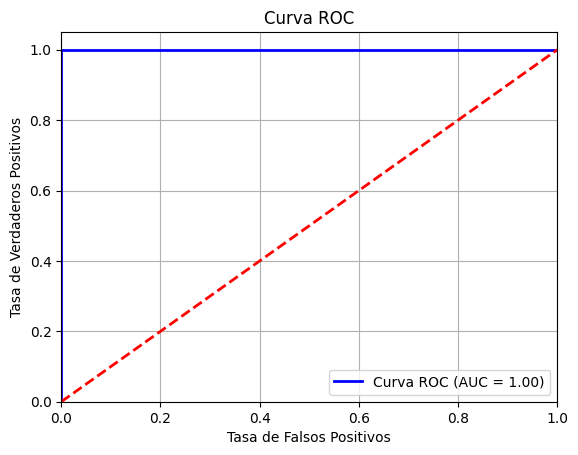

In [ ]:
from sklearn.metrics import auc

# Modelo regresión logística
log_model = LogisticRegression(max_iter=1000)

# Entrenar el modelo
log_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = log_model.predict(X_test)

# Evaluar la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de regresión logística:", accuracy)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)

# Calcular la curva ROC y el valor AUC
y_prob = log_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("Área bajo la curva (AUC):", roc_auc)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Verdaderos Negativo (TP): 1614 - NO DESOCUPADOS

Este es el número de casos en los que el modelo predijo correctamente que la persona no está desocupada (predicción 0) y efectivamente no está desocupada (realidad 0).

--------------------------------

Falsos Positivos (FP): 0

Este es el número de casos en los que el modelo predijo que la persona está desocupada (predicción 1), pero en realidad no está desocupada (realidad 0). En este caso, el modelo no cometió errores al predecir desocupados.

-------------------------------

Falsos Negativos (FN): 0

Este es el número de casos en los que el modelo predijo que la persona no está desocupada (predicción 0), pero en realidad está desocupada (realidad 1). Este es el número de desocupados que el modelo no logró identificar.

---------------------------------------
Verdaderos Positivos (TN): 90 - DESOCUPADOS


Número de casos en los que el modelo predijo correctamente que la persona está desocupada (predicción 1) y efectivamente está desocupada (realidad 1).

##### LDA

Matriz de confusión:
[[1614    0]
 [  11   79]]
Precisión del modelo LDA: 0.9935446009389671
Área bajo la curva (AUC): 0.9890541098719539


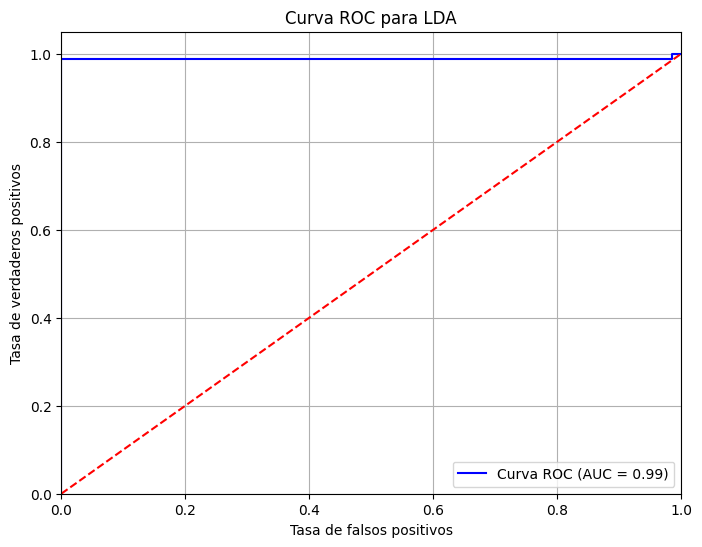

In [38]:
# Modelo LDA
lda_model = LinearDiscriminantAnalysis()

# Entrenar el modelo
lda_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = lda_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo LDA:", accuracy)

# Calcular la probabilidad para la curva ROC
y_prob = lda_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el AUC
auc = roc_auc_score(y_test, y_prob)
print("Área bajo la curva (AUC):", auc)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC para LDA')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [41]:
# VALIDACION CRUZADA

# Realizar validación cruzada con 5 pliegues
cv_scores = cross_val_score(lda_model, X_train, y_train, cv=5) 

# Imprimir los resultados de la validación cruzada
print("Puntuaciones de validación cruzada:", cv_scores)
print("Precisión media de la validación cruzada:", cv_scores.mean())

Puntuaciones de validación cruzada: [0.99496855 0.98742138 0.98993711 0.98992443 0.98488665]
Precisión media de la validación cruzada: 0.9894276254297166


##### KNN con k=3

Matriz de confusión para KNN:
[[1598   16]
 [  70   20]]
Precisión del modelo KNN: 0.9495305164319249
Área bajo la curva (AUC) para KNN: 0.6873537105879114


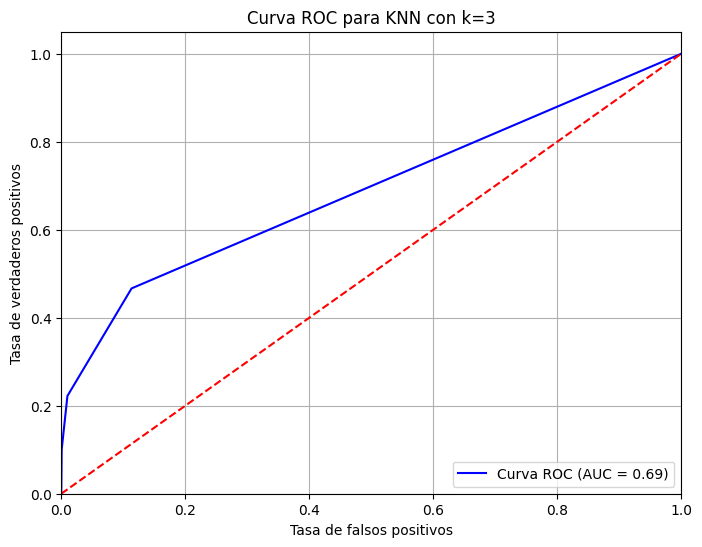

In [42]:
# Modelo KNN con k=3
knn_model = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo
knn_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión para KNN:")
print(conf_matrix)

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo KNN:", accuracy)

# Calcular la probabilidad para la curva ROC
y_prob = knn_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el AUC
auc = roc_auc_score(y_test, y_prob)
print("Área bajo la curva (AUC) para KNN:", auc)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC para KNN con k=3')
plt.legend(loc='lower right')
plt.grid()
plt.show()

##### Naive Bayes

Matriz de confusión para Naive Bayes:
[[1614    0]
 [  90    0]]
Precisión del modelo Naive Bayes: 0.9471830985915493
Área bajo la curva (AUC) para Naive Bayes: 0.7355431639818257


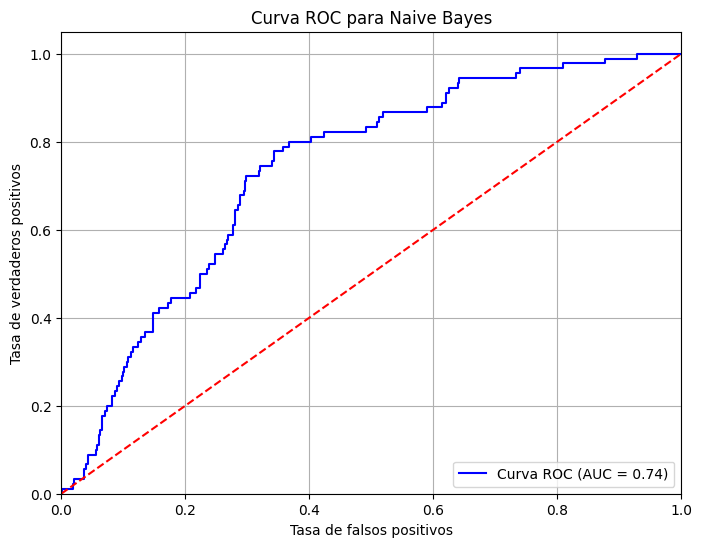

In [43]:
# Modelo Naive Bayes
nb_model = GaussianNB()

# Entrenar el modelo
nb_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = nb_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión para Naive Bayes:")
print(conf_matrix)

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo Naive Bayes:", accuracy)

# Calcular la probabilidad para la curva ROC
y_prob = nb_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el AUC
auc = roc_auc_score(y_test, y_prob)
print("Área bajo la curva (AUC) para Naive Bayes:", auc)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC para Naive Bayes')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Predicciones PARA LA GENTE QUE NO RESPONDIO SU ESTADO 2024

In [44]:
df_prediccion_2024_respondieron

,edad,ingreso,varon,mujer,con_pareja,sin_pareja,si_cobertura,no_cobertura,prim_inc,prim_com,...,inactividad_discapacitado,inactividad_estudiante,inactividad_jubilado/pensionado,inactividad_menor de 6 años,inactividad_otros,inactividad_rentista,PEA,PET,desocupado,intercept
7647,85,0,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
7650,26,500000,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,1,1,0,1
7654,66,1620000,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
7658,10,0,1,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
7659,5,0,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14685,21,0,1,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
14686,19,0,1,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
14687,16,0,0,1,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
14688,34,910000,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,1,1,0,1


In [45]:
# Identificar columnas comunes excluyendo la columna 'desocupado'
columnas_comunes = list(set(df_prediccion_2024_respondieron.columns).intersection(df_prediccion_2024_no_respondieron.columns))

#  DataFrames de entrenamiento y predicción solo con las columnas comunes
X_train = df_prediccion_2024_respondieron[columnas_comunes]  # Usar solo las columnas comunes en el conjunto de entrenamiento
y_train = df_prediccion_2024_respondieron['desocupado']  # Variable objetivo
X_no_respondieron = df_prediccion_2024_no_respondieron[columnas_comunes]  # Conjunto de datos sin la columna objetivo

# Entrenar el modelo regresión logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Predicciones en el conjunto de personas que no respondieron
y_pred_no_respondieron = modelo.predict(X_no_respondieron)

# Predicciones en `df_prediccion_2024_no_respondieron`
df_prediccion_2024_no_respondieron['prediccion_desocupado'] = y_pred_no_respondieron

# Calcular la proporción de personas predichas como desocupadas
proporcion_desocupados = (df_prediccion_2024_no_respondieron['prediccion_desocupado'].sum() / 
                          len(df_prediccion_2024_no_respondieron))

print("Proporción de personas no respondieron predichas como desocupadas:", proporcion_desocupados)

Proporción de personas no respondieron predichas como desocupadas: 0.14814814814814814


C:\Users\luciv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
# Crear y entrenar el modelo de Naive Bayes
modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train)

# Hacer predicciones en los datos de `no_respondieron`
X_no_respondieron = df_prediccion_2024_no_respondieron[columnas_comunes]
y_pred_no_respondieron = modelo_nb.predict(X_no_respondieron)
y_prob_no_respondieron = modelo_nb.predict_proba(X_no_respondieron)[:, 1]  # Probabilidad para clase positiva

# Añadir la predicción como una nueva columna en `df_prediccion_2024_no_respondieron`
df_prediccion_2024_no_respondieron['prediccion_desocupado'] = y_pred_no_respondieron

# Evaluación y análisis
# Proporción de personas predichas como desocupadas en `no_respondieron`
proporcion_desocupados = (df_prediccion_2024_no_respondieron['prediccion_desocupado'].sum() / 
                          len(df_prediccion_2024_no_respondieron))

print("Proporción de personas no respondieron predichas como desocupadas:", proporcion_desocupados)

Proporción de personas no respondieron predichas como desocupadas: 0.0


### Predicciones 2004

In [47]:
df_prediccion_2004_respondieron

,edad,ingreso,varon,mujer,con_pareja,sin_pareja,si_cobertura,no_cobertura,prim_inc,prim_com,...,inactividad_ama de casa,inactividad_discapacitado,inactividad_estudiante,inactividad_jubilado/pensionado,inactividad_menor de 6 años,inactividad_otros,inactividad_rentista,PEA,PET,desocupado
0,79,368,1,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,74,440,0,1,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,54,532,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
4,51,532,0,1,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
5,25,532,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,1,533,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7643,51,100,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
7644,55,100,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
7645,12,100,0,1,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
# Agregar la columna de intercepto al DataFrame de 2004
df_prediccion_2004_respondieron['intercept'] = 1  # Asegúrate de que esta columna se agregue correctamente

# Dividir la base de datos en entrenamiento y prueba
train, test = train_test_split(df_prediccion_2004_respondieron, test_size=0.3, random_state=101)

# Separar la variable dependiente 'desocupado' (y) y el resto de variables (X) en la base de entrenamiento
y_train = train['desocupado']  # Asignar la variable dependiente
X_train = train.drop(columns='desocupado')  # Eliminar 'desocupado' de X_train

# Agregar la columna de unos a X_train
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train.values])  

# Separar la variable dependiente y las variables independientes en el conjunto de prueba
y_test = test['desocupado']
X_test = test.drop(columns='desocupado')

# Agregar la columna de unos a X_test
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test.values]) 


##### Regresión

Precisión del modelo de regresión logística: 1.0
Matriz de confusión:
 [[2120    0]
 [   0  151]]
Área bajo la curva (AUC): 1.0


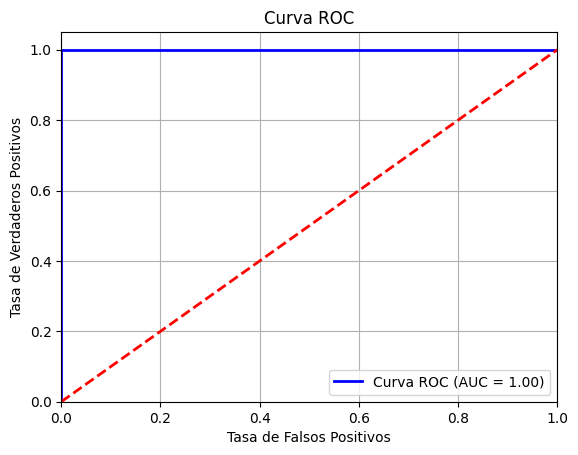

In [50]:
from sklearn.metrics import auc

# Regresión logística
log_model = LogisticRegression(max_iter=1000)

# Entrenar el modelo
log_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = log_model.predict(X_test)

# Evaluar la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de regresión logística:", accuracy)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)

# Calcular la curva ROC y el valor AUC
y_prob = log_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)  
print("Área bajo la curva (AUC):", roc_auc)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

##### LDA

Matriz de confusión:
[[2120    0]
 [   6  145]]
Precisión del modelo LDA: 0.9973579920739762
Área bajo la curva (AUC): 0.9675121829314007


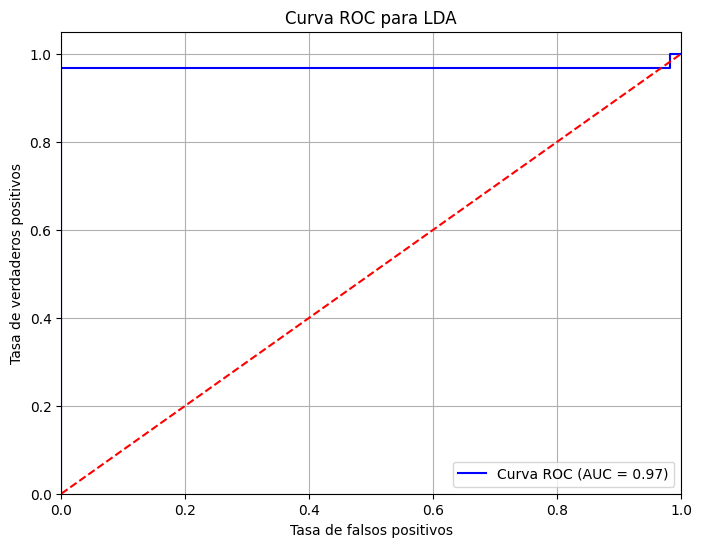

In [52]:
# Modelo LDA
lda_model = LinearDiscriminantAnalysis()

# Entrenar el modelo
lda_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = lda_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo LDA:", accuracy)

# Calcular la probabilidad para la curva ROC
y_prob = lda_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el AUC
auc = roc_auc_score(y_test, y_prob)
print("Área bajo la curva (AUC):", auc)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC para LDA')
plt.legend(loc='lower right')
plt.grid()
plt.show()

##### KNN k=3

Matriz de confusión para KNN:
[[2084   36]
 [ 119   32]]
Precisión del modelo KNN: 0.931748128577719
Área bajo la curva (AUC) para KNN: 0.7083390603523677


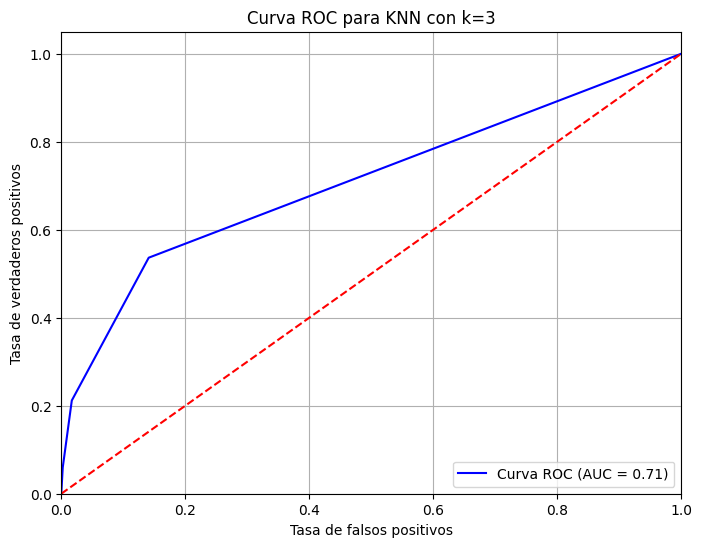

In [53]:
# Mdelo KNN con k=3
knn_model = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo
knn_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión para KNN:")
print(conf_matrix)

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo KNN:", accuracy)

# Calcular la probabilidad para la curva ROC
y_prob = knn_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el AUC
auc = roc_auc_score(y_test, y_prob)
print("Área bajo la curva (AUC) para KNN:", auc)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC para KNN con k=3')
plt.legend(loc='lower right')
plt.grid()
plt.show()

##### Bayes

Matriz de confusión para Naive Bayes:
[[2120    0]
 [   0  151]]
Precisión del modelo Naive Bayes: 1.0
Área bajo la curva (AUC) para Naive Bayes: 1.0


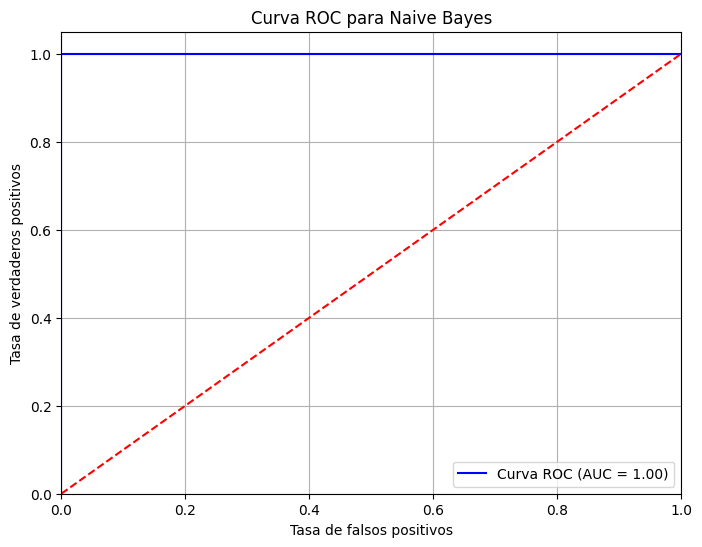

In [54]:
# Modelo Naive Bayes
nb_model = GaussianNB()

# Entrenar el modelo
nb_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = nb_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión para Naive Bayes:")
print(conf_matrix)

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo Naive Bayes:", accuracy)

# Calcular la probabilidad para la curva ROC
y_prob = nb_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el AUC
auc = roc_auc_score(y_test, y_prob)
print("Área bajo la curva (AUC) para Naive Bayes:", auc)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC para Naive Bayes')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Predicciones PARA LA GENTE QUE NO RESPONDIO SU ESTADO 2004

In [56]:
# Identificar columnas comunes excluyendo la columna 'desocupado'
columnas_comunes = list(set(df_prediccion_2004_respondieron.columns).intersection(df_prediccion_2004_no_respondieron.columns))

# DataFrames de entrenamiento y predicción solo con las columnas comunes
X_train = df_prediccion_2004_respondieron[columnas_comunes]  # Usar solo las columnas comunes en el conjunto de entrenamiento
y_train = df_prediccion_2004_respondieron['desocupado']  # Variable objetivo
X_no_respondieron = df_prediccion_2004_no_respondieron[columnas_comunes]  # Conjunto de datos sin la columna objetivo

# Entrenar el modelo de Regresión logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Predicciones en el conjunto de personas que no respondieron
y_pred_no_respondieron = modelo.predict(X_no_respondieron)

# Añadir las predicciones como nueva columna en `df_prediccion_2004_no_respondieron`
df_prediccion_2004_no_respondieron['prediccion_desocupado'] = y_pred_no_respondieron

# Calcular la proporción de personas predichas como desocupadas
proporcion_desocupados = (df_prediccion_2004_no_respondieron['prediccion_desocupado'].sum() / 
                          len(df_prediccion_2004_no_respondieron))

print("Proporción de personas no respondieron predichas como desocupadas:", proporcion_desocupados)

Proporción de personas no respondieron predichas como desocupadas: 0.0


C:\Users\luciv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
# Crear y entrenar el modelo de Naive Bayes
modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train)

# Hacer predicciones en los datos de `no_respondieron`
X_no_respondieron = df_prediccion_2004_no_respondieron[columnas_comunes]
y_pred_no_respondieron = modelo_nb.predict(X_no_respondieron)
y_prob_no_respondieron = modelo_nb.predict_proba(X_no_respondieron)[:, 1]  # Probabilidad para clase positiva

# Añadir la predicción como una nueva columna en `df_prediccion_2004_no_respondieron`
df_prediccion_2004_no_respondieron['prediccion_desocupado'] = y_pred_no_respondieron

# Evaluación y análisis
# Proporción de personas predichas como desocupadas en `no_respondieron`
proporcion_desocupados = (df_prediccion_2004_no_respondieron['prediccion_desocupado'].sum() / 
                          len(df_prediccion_2004_no_respondieron))

print("Proporción de personas no respondieron predichas como desocupadas:", proporcion_desocupados)

Proporción de personas no respondieron predichas como desocupadas: 0.0


### Tucuman

In [ ]:
#Punto 7, trabajamos con otro dataframe para obtener los datos de Tucumán
tucuman04 = pd.read_stata('Individual_t104.dta')
tucuman04=tucuman04 [tucuman04['aglomerado']=='Gran Tucumán - Tafí Viejo']

tucuman24 = pd.read_excel('usu_individual_T124.xlsx')
tucuman24=tucuman24 [tucuman24['AGLOMERADO']==29]

#2004
tucuman04.columns = tucuman04.columns.str.lower()
#2024
tucuman24.columns = tucuman24.columns.str.lower()

#dataframe combinado
tucuman = pd.concat([tucuman04, tucuman24], axis=0, join='inner')

#reemplazamos los valores de las columnas que utilizaremos 
tucuman['ch06'] = tucuman['ch06'].replace ('Menos de 1 año', 0) #pasamos la edad a cero
tucuman['ch06'] = tucuman['ch06'].replace (-1 , 0) #pasamos la edad a 0
tucuman['ch06'] = tucuman['ch06'].replace ('98 y más años' , 98) #pasamos la edad a 98

tucuman['estado'] = tucuman['estado'].replace ('Entrevista individual no realizada', 0)
tucuman['estado'] = tucuman['estado'].replace ('Ocupado', 1)
tucuman['estado'] = tucuman['estado'].replace ('Desocupado', 2)
tucuman['estado'] = tucuman['estado'].replace ('Inactivo', 3)
tucuman['estado'] = tucuman['estado'].replace ('Menor de 10 años', 4)
tucuman['estado'] = tucuman['estado'].replace ("Entrevista individual no realizada (no respuesta al cuestion", 0)


C:\Users\Mili\AppData\Local\Temp\ipykernel_14136\46538469.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tucuman['ch06'] = tucuman['ch06'].replace ('Menos de 1 año', 0) #pasamos la edad a cero
C:\Users\Mili\AppData\Local\Temp\ipykernel_14136\46538469.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tucuman['estado'] = tucuman['estado'].replace ("Entrevista individual no realizada (no respuesta al cuestion", 0)


In [ ]:
 #calcular tasa de desocupación (desocupados/PEA) y tasa de desocupación alternativa (DESOCUPADOS/PET)

#BASE DE DATOS RESPONDIERON / NORESPONDIERON
tucuman = tucuman[tucuman['estado'] != 0]
tucuman['PEA'] = tucuman['estado'].apply(lambda x: 1 if x in [1, 2] else 0) 
tucuman['PET']=np.where((tucuman['PEA']==1) & (tucuman['ch06'].between(16,65)),1,0)

tucuman

C:\Users\Mili\AppData\Local\Temp\ipykernel_14136\1749518531.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tucuman['PEA'] = tucuman['estado'].apply(lambda x: 1 if x in [1, 2] else 0)
C:\Users\Mili\AppData\Local\Temp\ipykernel_14136\1749518531.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tucuman['PET']=np.where((tucuman['PEA']==1) & (tucuman['ch06'].between(16,65)),1,0)


,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,PEA,PET
14493,125463,1.0,1.0,Sí,2004.0,1er. Trimestre,NOA,S,Gran Tucumán - Tafí Viejo,259.0,...,05,116.0,02,03,04,02,,04,1,1
14494,125463,1.0,2.0,Sí,2004.0,1er. Trimestre,NOA,S,Gran Tucumán - Tafí Viejo,259.0,...,05,116.0,02,03,04,02,,04,0,0
14495,125463,1.0,3.0,0.0,2004.0,1er. Trimestre,NOA,S,Gran Tucumán - Tafí Viejo,259.0,...,05,116.0,02,03,04,02,,04,0,0
14496,125463,1.0,4.0,0.0,2004.0,1er. Trimestre,NOA,S,Gran Tucumán - Tafí Viejo,259.0,...,05,116.0,02,03,04,02,,04,0,0
14497,125463,1.0,5.0,Sí,2004.0,1er. Trimestre,NOA,S,Gran Tucumán - Tafí Viejo,259.0,...,05,116.0,02,03,04,02,,04,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46010,TQRMNORUYHMOLUCDEHPJB00801354,1.0,2,1,2024.0,1,40,S,29,488.0,...,6,85800.0,2,2.0,3,2.0,NaN,3,1,1
46011,TQRMNORUYHMOLUCDEHPJB00801354,1.0,3,1,2024.0,1,40,S,29,488.0,...,6,85800.0,2,2.0,3,2.0,NaN,3,0,0
46012,TQRMNORUYHMOLUCDEHPJB00801354,1.0,4,1,2024.0,1,40,S,29,488.0,...,6,85800.0,2,2.0,3,2.0,NaN,3,0,0
46013,TQRMNORUYHMOLUCDEHPJB00801354,1.0,5,0,2024.0,1,40,S,29,488.0,...,6,85800.0,2,2.0,3,2.0,NaN,3,0,0


In [ ]:
#tabla de tasas
tucuman['desocupado'] = tucuman['estado'].apply(lambda x: 1 if x in [2] else 0) 

#tasa de desocupados
t04 = ((tucuman['desocupado'] == 1) & (tucuman['ano4'] == 2004)).sum()
pea_t04=tucuman[tucuman['ano4'] == 2004]['PEA'].sum()
tt04= t04/(pea_t04)

t24 = ((tucuman['desocupado'] == 1) & (tucuman['ano4'] == 2024)).sum()
pea_t24=tucuman[tucuman['ano4'] == 2024]['PEA'].sum()
tt24= t24/(pea_t24)

#tasa de desocupación alternativa
pet_t04=tucuman[tucuman['ano4'] == 2004]['PET'].sum()
tt04a= t04/(pet_t04)

pet_t24=tucuman[tucuman['ano4'] == 2024]['PET'].sum()
tt24a= t04/(pet_t24)


#tabla 
tabla = pd.DataFrame({
    'Año': [2004, 2024],
    'TD INDEC': [tt04, tt24],
    'TD Alternativa': [tt04a, tt24a]
})


tabla

C:\Users\Mili\AppData\Local\Temp\ipykernel_14136\2321676582.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tucuman['desocupado'] = tucuman['estado'].apply(lambda x: 1 if x in [2] else 0)


,Año,TD INDEC,TD Alternativa
0,2004,0.168880,0.173998
1,2024,0.082822,0.186387
